---
# EDA

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
# func 모음

# 1. 종목코드를 6자리로 통일. ex) 990 -> 000990
def padding(x):
    x = str(x)
    return x.rjust(6, "0")

# 2. True, False 반전
def func_not(x):
    return not x

In [3]:
df_부실징후 = pd.read_csv("./datasets/부실징후_전처리끝.csv", index_col=0)
df_부실징후["거래소코드"] = df_부실징후["거래소코드"].map(padding)
print(df_부실징후.shape[0])
df_부실징후

781


회사명   거래소코드    회계년도  한계기업여부  이자보상배율(이자비용)  부가가치(백만원)  금융비용(백만원)  \
0      케이알모터스(주)  000040  2013.0       1         -4.29    9379.15     603.89   
1      성창기업지주(주)  000180  2013.0       1         -1.39   28423.83    1111.80   
2          디엘(주)  000210  2014.0       0         -3.33  494645.17   31419.37   
3       일동홀딩스(주)  000230  2017.0       1          0.61   20134.11    1550.73   
4       (주)대유플러스  000300  2012.0       0         -4.88   28096.06    3110.15   
..           ...     ...     ...     ...           ...        ...        ...   
776      (주)에이트원  230980  2018.0       1         -0.14   12878.02    4094.78   
777  (주)얼라인드제네틱스  238120  2017.0       1        -29.21    2091.01    -294.03   
778       피씨엘(주)  241820  2018.0       1        -29.21   -2639.11     -28.40   
779       (주)아스타  246720  2018.0       1        -22.95    -929.19    -333.43   
780       (주)모비스  250060  2018.0       1        -27.35    2070.53     -86.30   

     매출액총이익률  매출액순이익률  총자본사업이익률  ...  순자산가치(백만원)          KZ지수   산업매출성장률  \
0       7.59    -6.64     -2.77  ...     57315.0 -8.591876e+10  8.405309   
1      14.62    -2.82     -0.52  ...    253423.0 -4.619692e+10  8.684003   
2       2.11    -4.74     -2.06  ...   2648892.0  8.205913e+10 -2.139125   
3      44.23     0.06      0.78  ...    174057.0 -4.613540e+11  7.191381   
4       0.91    -4.78     -2.90  ...    101198.0 -2.580369e+10  5.164151   
..       ...      ...       ...  ...         ...           ...       ...   
776     9.05    -1.56     -1.08  ...     22545.0 -1.272294e+11  6.732754   
777    58.33   -31.13     -4.97  ...     22022.0 -3.992706e+11  7.191381   
778    34.40  -249.62    -45.10  ...     12676.0 -4.106535e+11  2.340424   
779    58.33  -202.15    -14.10  ...     33248.0 -1.545284e+10  2.340424   
780    26.81   -14.17     -4.83  ...     24428.0 -3.375271e+11  6.732754   

             WW지수    NCAV지수  기업생명주기  순매수거래량_기관  순매수거래대금 비중_기관  순매수거래량_외국인  \
0   -6.576044e+08  0.001550       1      154.0       0.000010    666080.0   
1    2.632381e+09  0.106379       0    28438.0       0.001337    -43268.0   
2    1.844954e+09 -1.336562       1 -2124518.0      -0.010160   -122922.0   
3    6.045934e+08 -0.263390       0     -854.0       0.000013   -148806.0   
4    7.068060e+08 -2.521432       0 -1414659.0      -0.002001  -1238620.0   
..            ...       ...     ...        ...            ...         ...   
776 -5.899405e+09 -0.068759       1     8810.0       0.000218   -192641.0   
777  3.283293e+09  0.446974       0    30809.0       0.001985     -8713.0   
778  2.617107e+10  0.049385       3        0.0       0.000000    -51504.0   
779  1.086485e+10  0.227212       0        0.0       0.000000   -139221.0   
780  2.560419e+09  0.098268       0   -11056.0      -0.000038    -87368.0   

     순매수거래대금 비중_외국인  
0          0.001283  
1          0.000147  
2          0.000605  
3         -0.001702  
4         -0.002065  
..              ...  
776       -0.005370  
777       -0.000922  
778       -0.001132  
779       -0.001538  
780       -0.001121  

[781 rows x 88 columns]

In [4]:
# list(df_부실징후.columns)
list_winsor = [ '이자보상배율(이자비용)', '부가가치(백만원)', '금융비용(백만원)', '매출액총이익률', '매출액순이익률', '총자본사업이익률', '총자본순이익률', '자기자본순이익률', '경영자본순이익률', '자본금순이익률', '매출원가대매출액비율', '영업비용대영업수익비율',
    '금융손익비율', '금융비용부담률', '기업순이익률', '인건비대총비용비율', '금융비용대총비용비율', '이자부담률', '지급이자율', '차입금평균이자율', '유보율', '유동자산구성비율', '재고자산대유동자산비율', '유동자산대비유동자산비율', '자기자본구성비율',
    '타인자본구성비율', '자기자본배율', '유동비율', '현금비율', '매출채권비율', '매입채무대재고자산비율', '순운전자본비율', '차입금의존도', '차입금비율', '총자본회전률', '자기자본회전률', '자본금회전률', '타인자본회전률', '매입채무회전률',
    '당좌자산회전률', '재고자산회전률', '매출채권회전률', '비유동자산회전률', '유형자산회전율', '순운전자본회전률', '사내유보대자기자본비율', '자기자본배당률', '배당성향', '이익잉여금(결손금)(요약)(백만원)', '비유동금융부채(요약)(백만원)', '비유동자산증가율',
    '유동금융부채(요약)(백만원)', '외국인_주식분포비율', '장기금융부채(백만원)', '자산대비자본비율', '차입', '총자본증가율', '유형자산증가율', '비유동자산(백만원)', '자기자본증가율', '매출액증가율', '직원증감률', '자산대비_장기금융부채비율',
    '투자활동현금흐름증감률', 'LEV지수', '순자산가치(백만원)', 'KZ지수', 'WW지수', 'NCAV지수', '순매수거래량_기관', '순매수거래대금 비중_기관', '순매수거래량_외국인', '순매수거래대금 비중_외국인']

In [5]:
# # 상하위 0.5%, 2.5% 이상치 대체

# from scipy.stats.mstats import winsorize
# for i in list_winsor:
#     df_부실징후[i]= winsorize(df_부실징후[i], limits=[0.025, 0.025])

전체 데이터 수 : 781
한계기업 데이터 수 : 562
회생기업 데이터 수 : 219


/Users/kyle/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kyle/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kyle/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kyle/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kyle/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from current font.
  fig.canvas.

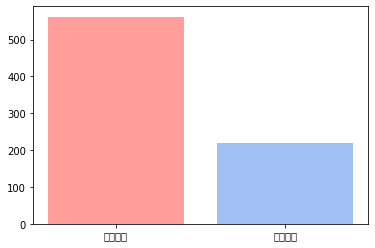

In [6]:
import matplotlib.pyplot as plt
import numpy as np

print("전체 데이터 수 :", df_부실징후.shape[0])
print("한계기업 데이터 수 :", df_부실징후[df_부실징후["한계기업여부"]==1].shape[0])
print("회생기업 데이터 수 :", df_부실징후[df_부실징후["한계기업여부"]==0].shape[0])

# --------------
x = np.arange(2)
years = ['한계기업', '회생기업']
values = [df_부실징후[df_부실징후["한계기업여부"]==1].shape[0], df_부실징후[df_부실징후["한계기업여부"]==0].shape[0]]

plt.bar(x, values, color=["#FF9E9B", "#A1C0F4"])
plt.xticks(x, years)

plt.show()

2012년 :  276
2013년 :  117
2014년 :  89
2015년 :  58
2016년 :  67
2017년 :  83
2018년 :  91


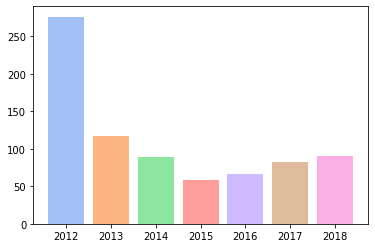

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# 각 년도 기업수
list_year = [2012, 2013,2014,2015,2016,2017,2018]
for i in list_year:
        print(str(i)+"년 : ", len(df_부실징후[df_부실징후["회계년도"]==i]["거래소코드"].unique()))          

# --------------
x = np.arange(7)
years = ['2012', '2013', '2014', '2015', '2016', '2017', '2018']
values = [df_부실징후[df_부실징후["회계년도"]==2012].shape[0], df_부실징후[df_부실징후["회계년도"]==2013].shape[0], df_부실징후[df_부실징후["회계년도"]==2014].shape[0]
        , df_부실징후[df_부실징후["회계년도"]==2015].shape[0], df_부실징후[df_부실징후["회계년도"]==2016].shape[0], df_부실징후[df_부실징후["회계년도"]==2017].shape[0], df_부실징후[df_부실징후["회계년도"]==2018].shape[0]]

plt.bar(x, values, color=["#A1C0F4", "#FFB483", "#8CE5A1", "#FF9E9B", "#CFBBFF", "#DEBB9B", "#FAB0E4"])
plt.xticks(x, years)

plt.show()

---
# Scaling

In [8]:
target = "한계기업여부"
y_scale = df_부실징후[target]
X_scale = df_부실징후.drop(["회사명","거래소코드","회계년도",target], axis=1)

In [9]:
from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler_stan = StandardScaler()
scaler_stan.fit(X_scale)
data_scaled_stan = scaler_stan.transform(X_scale)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
x_scaled_stan = pd.DataFrame(data = data_scaled_stan, columns=X_scale.columns)
x_scaled_stan

이자보상배율(이자비용)  부가가치(백만원)  금융비용(백만원)   매출액총이익률   매출액순이익률  총자본사업이익률  \
0        0.301414  -0.250111  -0.343619 -0.369394  0.418302  0.338727   
1        0.589858  -0.043915  -0.314997  0.058636  0.491374  0.555950   
2        0.396899   5.003844   1.392957 -0.703051  0.454647  0.407273   
3        0.788784  -0.133667  -0.290261  1.861479  0.546465  0.681457   
4        0.242731  -0.047464  -0.202381 -0.776114  0.453882  0.326176   
..            ...        ...        ...       ...       ...       ...   
776      0.714187  -0.212229  -0.146894 -0.280500  0.515476  0.501886   
777     -2.177210  -0.329019  -0.394221  2.719976 -0.050160  0.126331   
778     -2.177210  -0.380232  -0.379251  1.262967 -4.229596 -3.747961   
779     -1.554570  -0.361719  -0.396441  2.719976 -3.321555 -0.755111   
780     -1.992208  -0.329241  -0.382514  0.800840  0.274263  0.139847   

      총자본순이익률  자기자본순이익률  경영자본순이익률   자본금순이익률  ...  순자산가치(백만원)      KZ지수  \
0    0.281416  0.416472  0.451576  0.690109  ...   -0.246565  0.240357   
1    0.496911  0.653769  0.707628  0.664414  ...    0.183983  0.530084   
2    0.355759  0.420055  0.476277 -0.651512  ...    5.443144  1.465571   
3    0.563218  0.712749  0.790167  0.810900  ...    0.009738 -2.498029   
4    0.412522  0.278944  0.411210  0.491826  ...   -0.150222  0.678830   
..        ...       ...       ...       ...  ...         ...       ...   
776  0.504446  0.550416  0.707025  0.252418  ...   -0.322901 -0.060959   
777  0.211593  0.493366  0.361807  0.094309  ...   -0.324050 -2.045200   
778 -1.625895 -0.563585 -1.898677 -0.117637  ...   -0.344568 -2.128225   
779 -0.008925  0.376784 -0.173190  0.424735  ...   -0.299403  0.754328   
780  0.498418  0.661761  0.687143  0.690313  ...   -0.318767 -1.594849   

      산업매출성장률      WW지수    NCAV지수    기업생명주기  순매수거래량_기관  순매수거래대금 비중_기관  \
0    0.674352 -0.500688  0.444561 -0.397848   0.097270       0.170875   
1    0.728829 -0.081035  0.515968 -1.112144   0.121588       0.540234   
2   -1.386832 -0.181475 -0.466930 -0.397848  -1.729511      -2.661666   
3    0.437058 -0.339689  0.264090 -1.112144   0.096403       0.171706   
4    0.040783 -0.326651 -1.274035 -1.112144  -1.119178      -0.389287   
..        ...       ...       ...       ...        ...            ...   
776  0.347407 -1.169305  0.396668 -0.397848   0.104712       0.228768   
777  0.437058  0.001992  0.747973 -1.112144   0.123627       0.720781   
778 -0.511188  2.921439  0.477145  1.030745   0.097138       0.167974   
779 -0.511188  0.969057  0.598277 -1.112144   0.097138       0.167974   
780  0.347407 -0.090214  0.510443 -1.112144   0.087632       0.157445   

     순매수거래량_외국인  순매수거래대금 비중_외국인  
0      0.552711        0.495257  
1     -0.017030        0.124305  
2     -0.081008        0.273672  
3     -0.101797       -0.479703  
4     -0.977126       -0.598424  
..          ...             ...  
776   -0.137005       -1.678050  
777    0.010724       -0.224976  
778   -0.023645       -0.293616  
779   -0.094099       -0.426234  
780   -0.052451       -0.289971  

[781 rows x 84 columns]

In [10]:
# from sklearn.preprocessing import RobustScaler

# # StandardScaler객체 생성
# scaler_robust = RobustScaler()
# scaler_robust.fit(X_scale)
# data_scaled_robust = scaler_robust.transform(X_scale)

# # transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
# x_scaled_stan = pd.DataFrame(data = data_scaled_robust, columns=X_scale.columns)
# x_scaled_stan # x_scaled_robust

In [11]:
# from sklearn.preprocessing import MinMaxScaler

# # StandardScaler객체 생성
# scaler_minmax = MinMaxScaler()
# scaler_minmax.fit(X_scale)
# data_scaled_minmax = scaler_minmax.transform(X_scale)

# # transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
# x_scaled_minmax = pd.DataFrame(data = data_scaled_minmax, columns=X_scale.columns)
# x_scaled_minmax

---
## EDA

### 1. Data type

In [12]:
df_부실징후.info()
# df_부실징후.isna().sum().to_dict()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 781 entries, 0 to 780
Data columns (total 88 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   회사명                  781 non-null    object 
 1   거래소코드                781 non-null    object 
 2   회계년도                 781 non-null    float64
 3   한계기업여부               781 non-null    int64  
 4   이자보상배율(이자비용)         781 non-null    float64
 5   부가가치(백만원)            781 non-null    float64
 6   금융비용(백만원)            781 non-null    float64
 7   매출액총이익률              781 non-null    float64
 8   매출액순이익률              781 non-null    float64
 9   총자본사업이익률             781 non-null    float64
 10  총자본순이익률              781 non-null    float64
 11  자기자본순이익률             781 non-null    float64
 12  경영자본순이익률             781 non-null    float64
 13  자본금순이익률              781 non-null    float64
 14  매출원가대매출액비율           781 non-null    float64
 15  영업비용대영업수익비율          781 non-null    flo

#### 2. 기술통계량

In [13]:
x_scaled_stan.describe().T

count          mean       std        min       25%       50%  \
이자보상배율(이자비용)    781.0 -6.573203e-16  1.000641  -2.177210 -0.192918  0.453593   
부가가치(백만원)       781.0  1.376051e-16  1.000641  -1.038323 -0.351431 -0.267806   
금융비용(백만원)       781.0  5.373423e-17  1.000641  -0.459427 -0.366758 -0.306407   
매출액총이익률         781.0  1.421540e-17  1.000641  -1.974356 -0.620854 -0.208654   
매출액순이익률         781.0 -8.145426e-17  1.000641  -4.229596  0.060786  0.364551   
...               ...           ...       ...        ...       ...       ...   
기업생명주기          781.0  3.440128e-16  1.000641  -1.112144 -1.112144 -0.397848   
순매수거래량_기관       781.0  3.310412e-17  1.000641  -5.435721  0.049409  0.097125   
순매수거래대금 비중_기관   781.0  7.854011e-18  1.000641 -10.018776  0.028675  0.167878   
순매수거래량_외국인      781.0 -1.244736e-17  1.000641 -22.160633 -0.025131  0.017722   
순매수거래대금 비중_외국인  781.0 -1.016401e-17  1.000641 -13.210563 -0.177378  0.069869   

                     75%        max  
이자보상배율(이자비용)    0.691310   0.826580  
부가가치(백만원)      -0.073931   5.003844  
금융비용(백만원)      -0.168136   4.750676  
매출액총이익률         0.372810   2.719976  
매출액순이익률         0.499791   0.656264  
...                  ...        ...  
기업생명주기          1.030745   1.745042  
순매수거래량_기관       0.098614  13.697642  
순매수거래대금 비중_기관   0.170487   4.326594  
순매수거래량_외국인      0.057156   7.699762  
순매수거래대금 비중_외국인  0.210611   4.884900  

[84 rows x 8 columns]

#### 3. Boxplot

/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_60771/2852342162.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


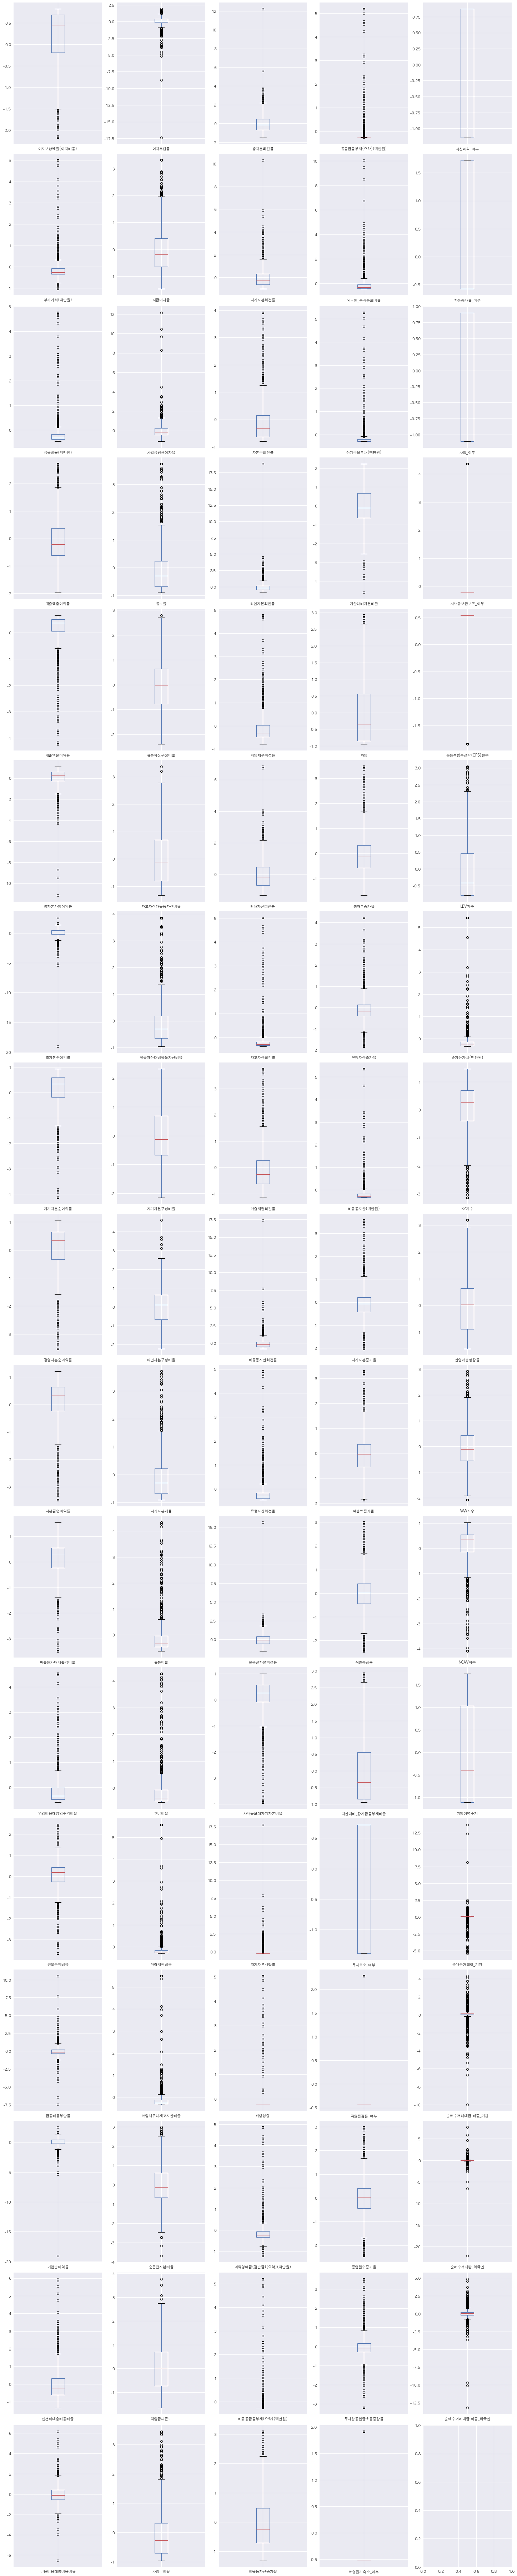

In [14]:
df_부실징후_outlier = x_scaled_stan
%matplotlib inline
plt.style.use('seaborn')
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "AppleGothic"

ncols = 5
nrows = 17

fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)

fig.set_size_inches((20, 100))

for col, ax in zip(df_부실징후_outlier.columns, axs.T.ravel()):
    df_부실징후_outlier[[col]].boxplot(ax=ax)
    
plt.show()

#### 4. Distplot

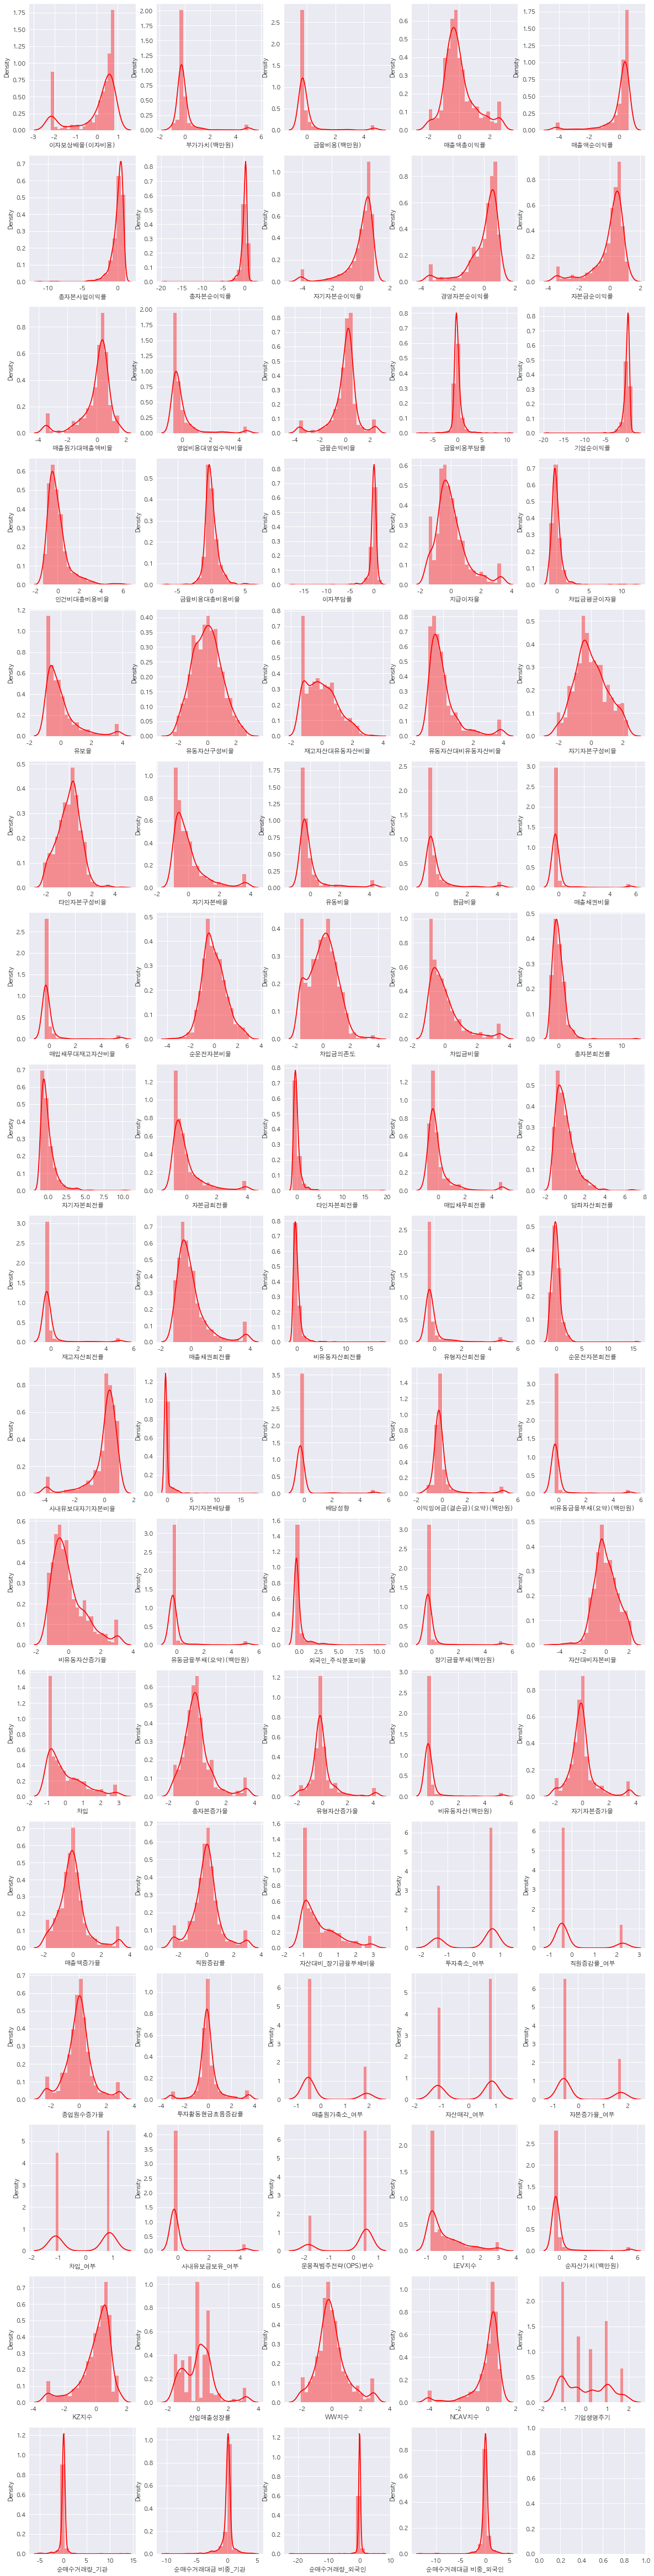

In [16]:
# distplot
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False
col_n = 5
row_n = 17

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))

for i, col in enumerate(x_scaled_stan.columns[:]):
    sns.distplot(x_scaled_stan[col], bins=20, ax=ax[int(i/col_n),int(i%col_n)] , color='red')

#### 5. QQplot

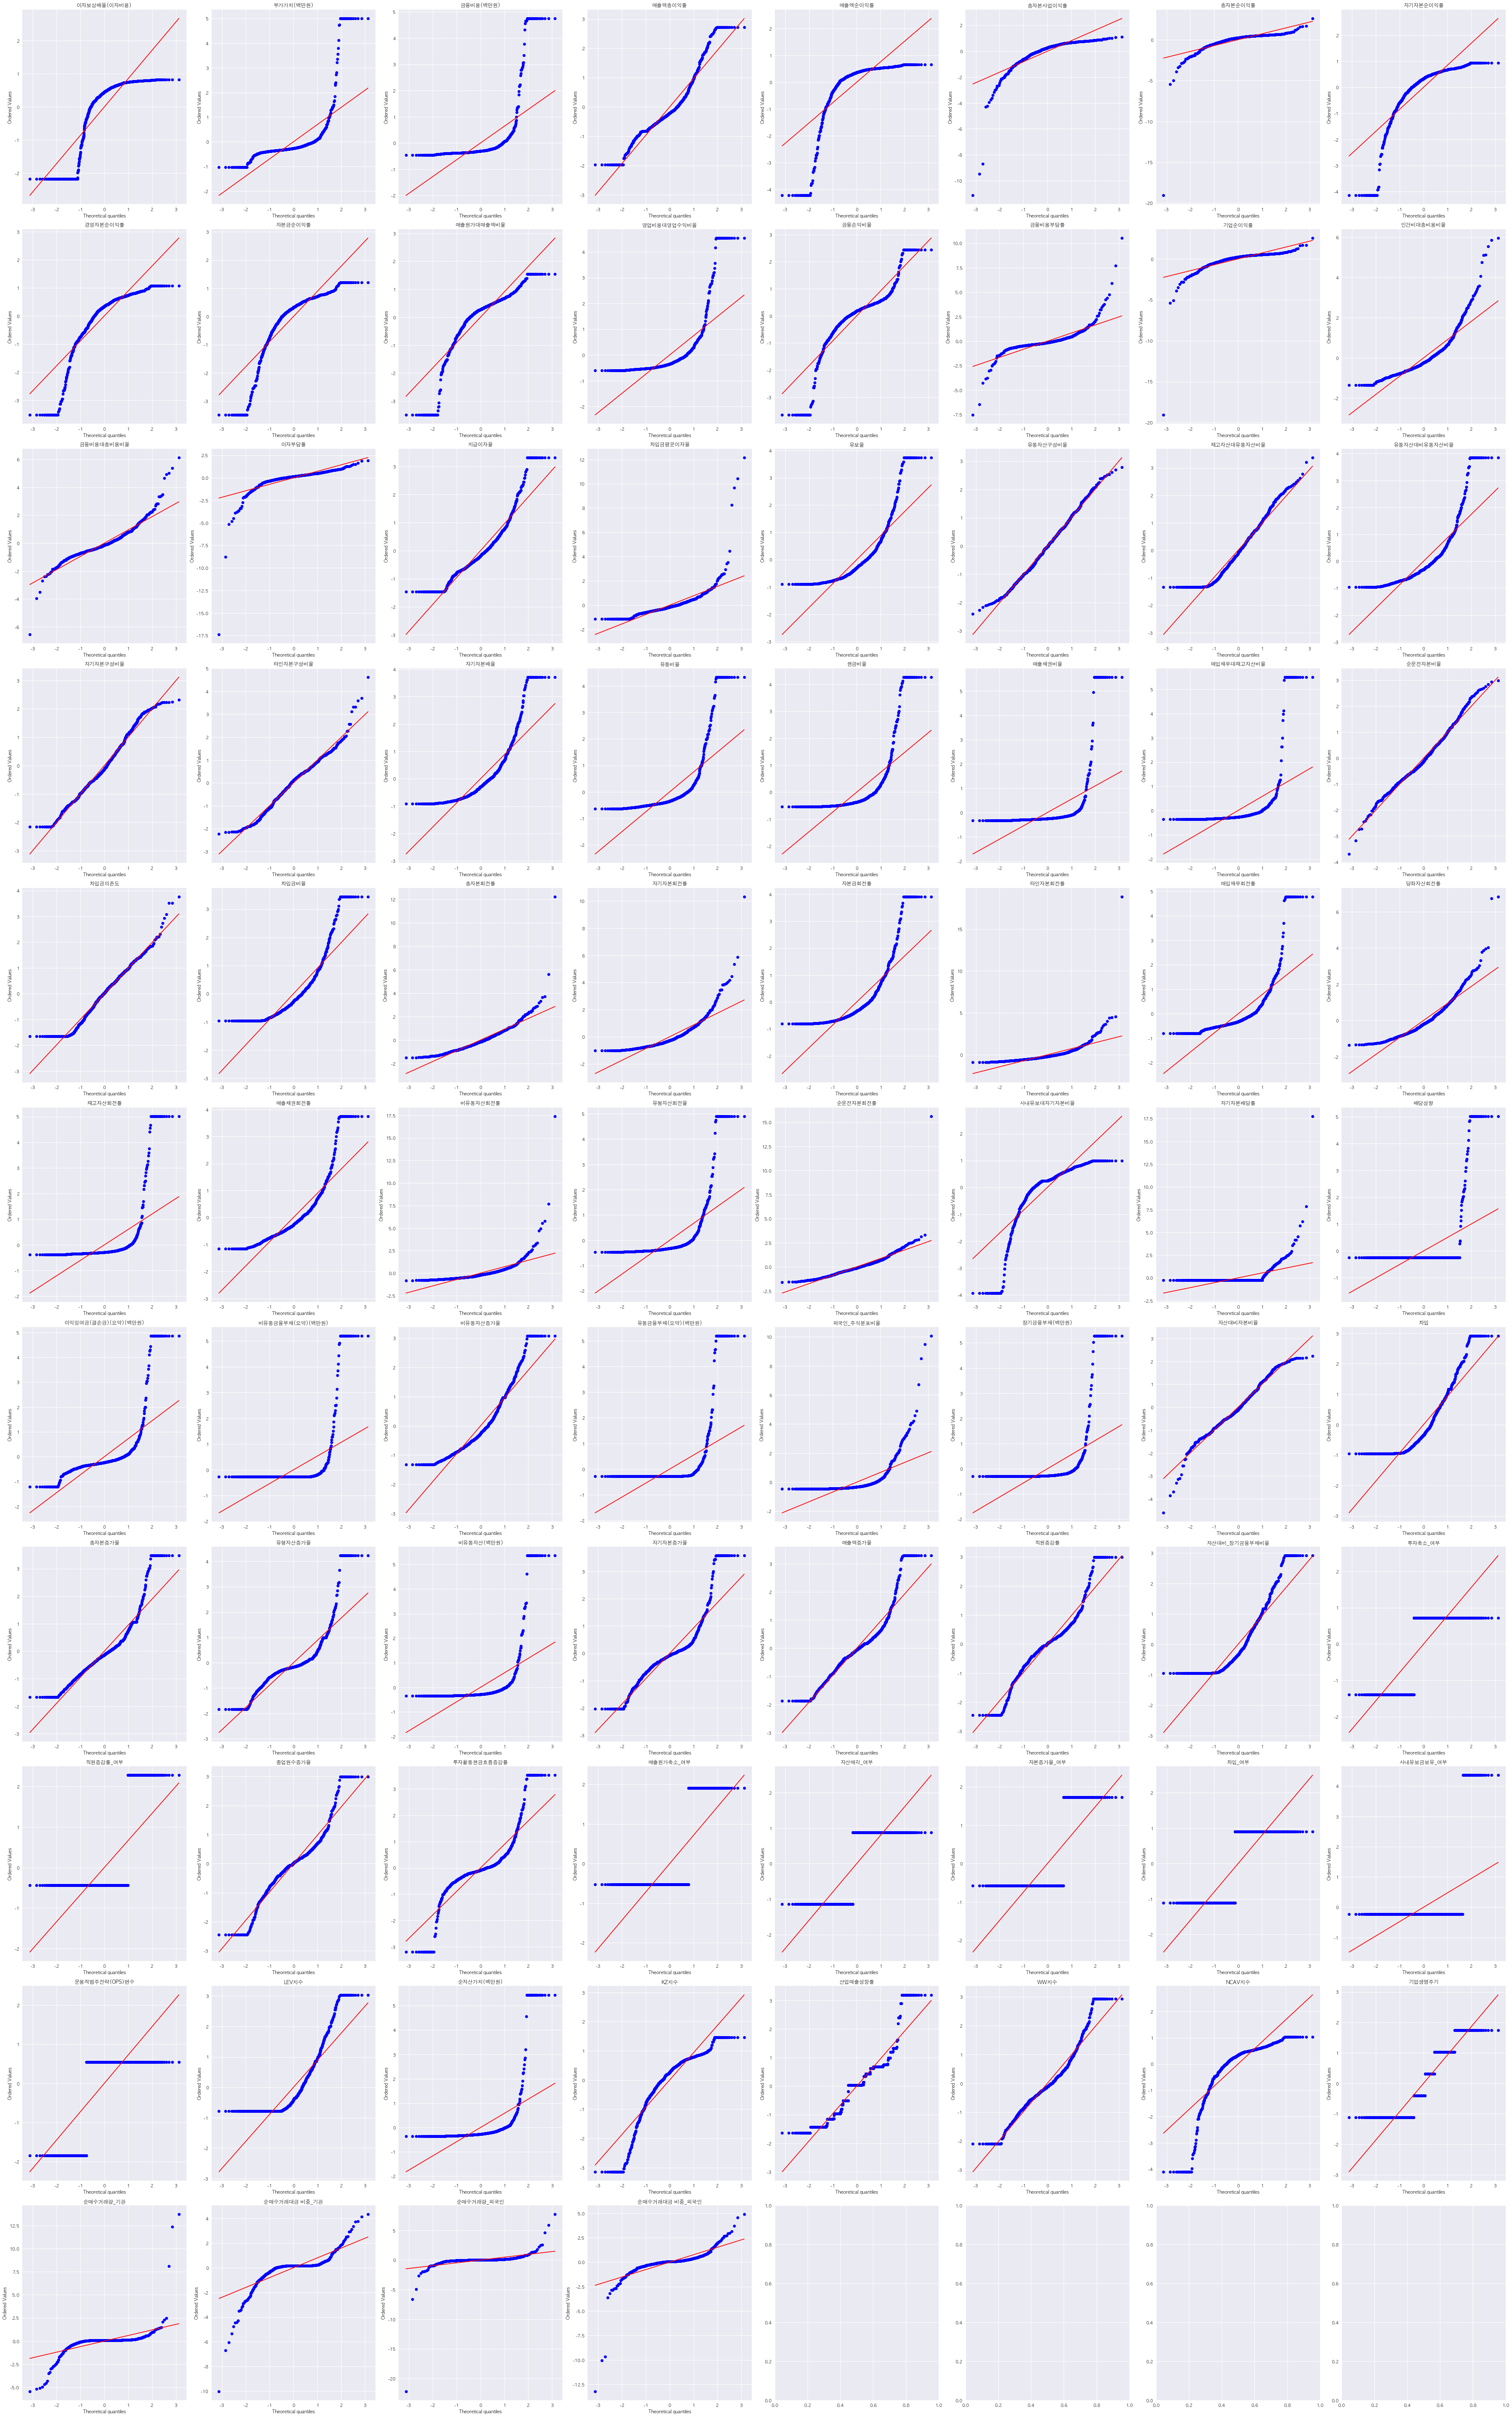

In [17]:
from scipy import stats

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "AppleGothic"
# 85
ncols = 8
nrows = 11

fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)
fig.set_size_inches((50, 80))

for ax, i in zip(axs.ravel(), x_scaled_stan):
        stats.probplot(x_scaled_stan[i], dist=stats.norm, plot=ax)
        ax.set_title(str(i))

plt.show()

#### 6. 샤피로 테스트

In [18]:
from scipy import stats
from scipy.stats import shapiro

def Shapiro(x_scaled_stan):
    Shapi = []
    Shapi.append([col for col in x_scaled_stan])
    for i in Shapi:
        for j in i:
            shapiro_test,p_val = shapiro(x_scaled_stan[j])
            print(j,"Test-statistics : {}, p-value : {}". format(shapiro_test,p_val))

Shapiro(x_scaled_stan.iloc[:,:])

이자보상배율(이자비용) Test-statistics : 0.7256078720092773, p-value : 6.666506725066551e-34
부가가치(백만원) Test-statistics : 0.4832768440246582, p-value : 1.286391990250182e-42
금융비용(백만원) Test-statistics : 0.40721970796585083, p-value : 1.2611686178923354e-44
매출액총이익률 Test-statistics : 0.9268571138381958, p-value : 4.780085474427294e-19
매출액순이익률 Test-statistics : 0.5762165188789368, p-value : 8.939737695991246e-40
총자본사업이익률 Test-statistics : 0.6558939814567566, p-value : 6.7043414320455625e-37
총자본순이익률 Test-statistics : 0.5213006138801575, p-value : 1.6486276432781473e-41
자기자본순이익률 Test-statistics : 0.7060720920562744, p-value : 8.458872271785307e-35
경영자본순이익률 Test-statistics : 0.7835386991500854, p-value : 6.62784151999274e-31
자본금순이익률 Test-statistics : 0.7859959006309509, p-value : 9.162122704772332e-31
매출원가대매출액비율 Test-statistics : 0.8136994242668152, p-value : 4.39261226705669e-29
영업비용대영업수익비율 Test-statistics : 0.550421953201294, p-value : 1.3037540782231666e-40
금융손익비율 Test-statistics : 0.840021014213562,

#### 7. 앤더슨

In [19]:
# 엔달슨 - 달링
from scipy import stats
from scipy.stats import anderson

def Anderson(x_scaled_stan):
    ander = []
    ander.append([col for col in x_scaled_stan])
    for i in ander:
        for j in i:
            anderson_test = anderson(x_scaled_stan[j], dist='norm')
            print(j,anderson_test)

Anderson(x_scaled_stan)

이자보상배율(이자비용) AndersonResult(statistic=86.37295877188615, critical_values=array([0.573, 0.653, 0.783, 0.913, 1.086]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
부가가치(백만원) AndersonResult(statistic=137.471306751685, critical_values=array([0.573, 0.653, 0.783, 0.913, 1.086]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
금융비용(백만원) AndersonResult(statistic=175.38216337003496, critical_values=array([0.573, 0.653, 0.783, 0.913, 1.086]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
매출액총이익률 AndersonResult(statistic=20.346003817037854, critical_values=array([0.573, 0.653, 0.783, 0.913, 1.086]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
매출액순이익률 AndersonResult(statistic=115.1235192025157, critical_values=array([0.573, 0.653, 0.783, 0.913, 1.086]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
총자본사업이익률 AndersonResult(statistic=51.28432472655959, critical_values=array([0.573, 0.653, 0.783, 0.913, 1.086]), significance_level=array([1

#### 8. 산점도(pair plot)

In [20]:
# cmap = sns.light_palette("darkgray", as_cmap = True)
# sns.set(font="AppleGothic",rc = {'figure.figsize':(16,8)})  
# # sns.heatmap(x.corr(), annot = True, cmap = cmap)
# # plt.show()

# # 4) 변수끼리 산점도를 시각화
# sns.pairplot(x_scaled_robust)
# plt.show()

---
# Feature Selection

## 0. Heatmap

<AxesSubplot: title={'center': 'Correlation of Features'}>

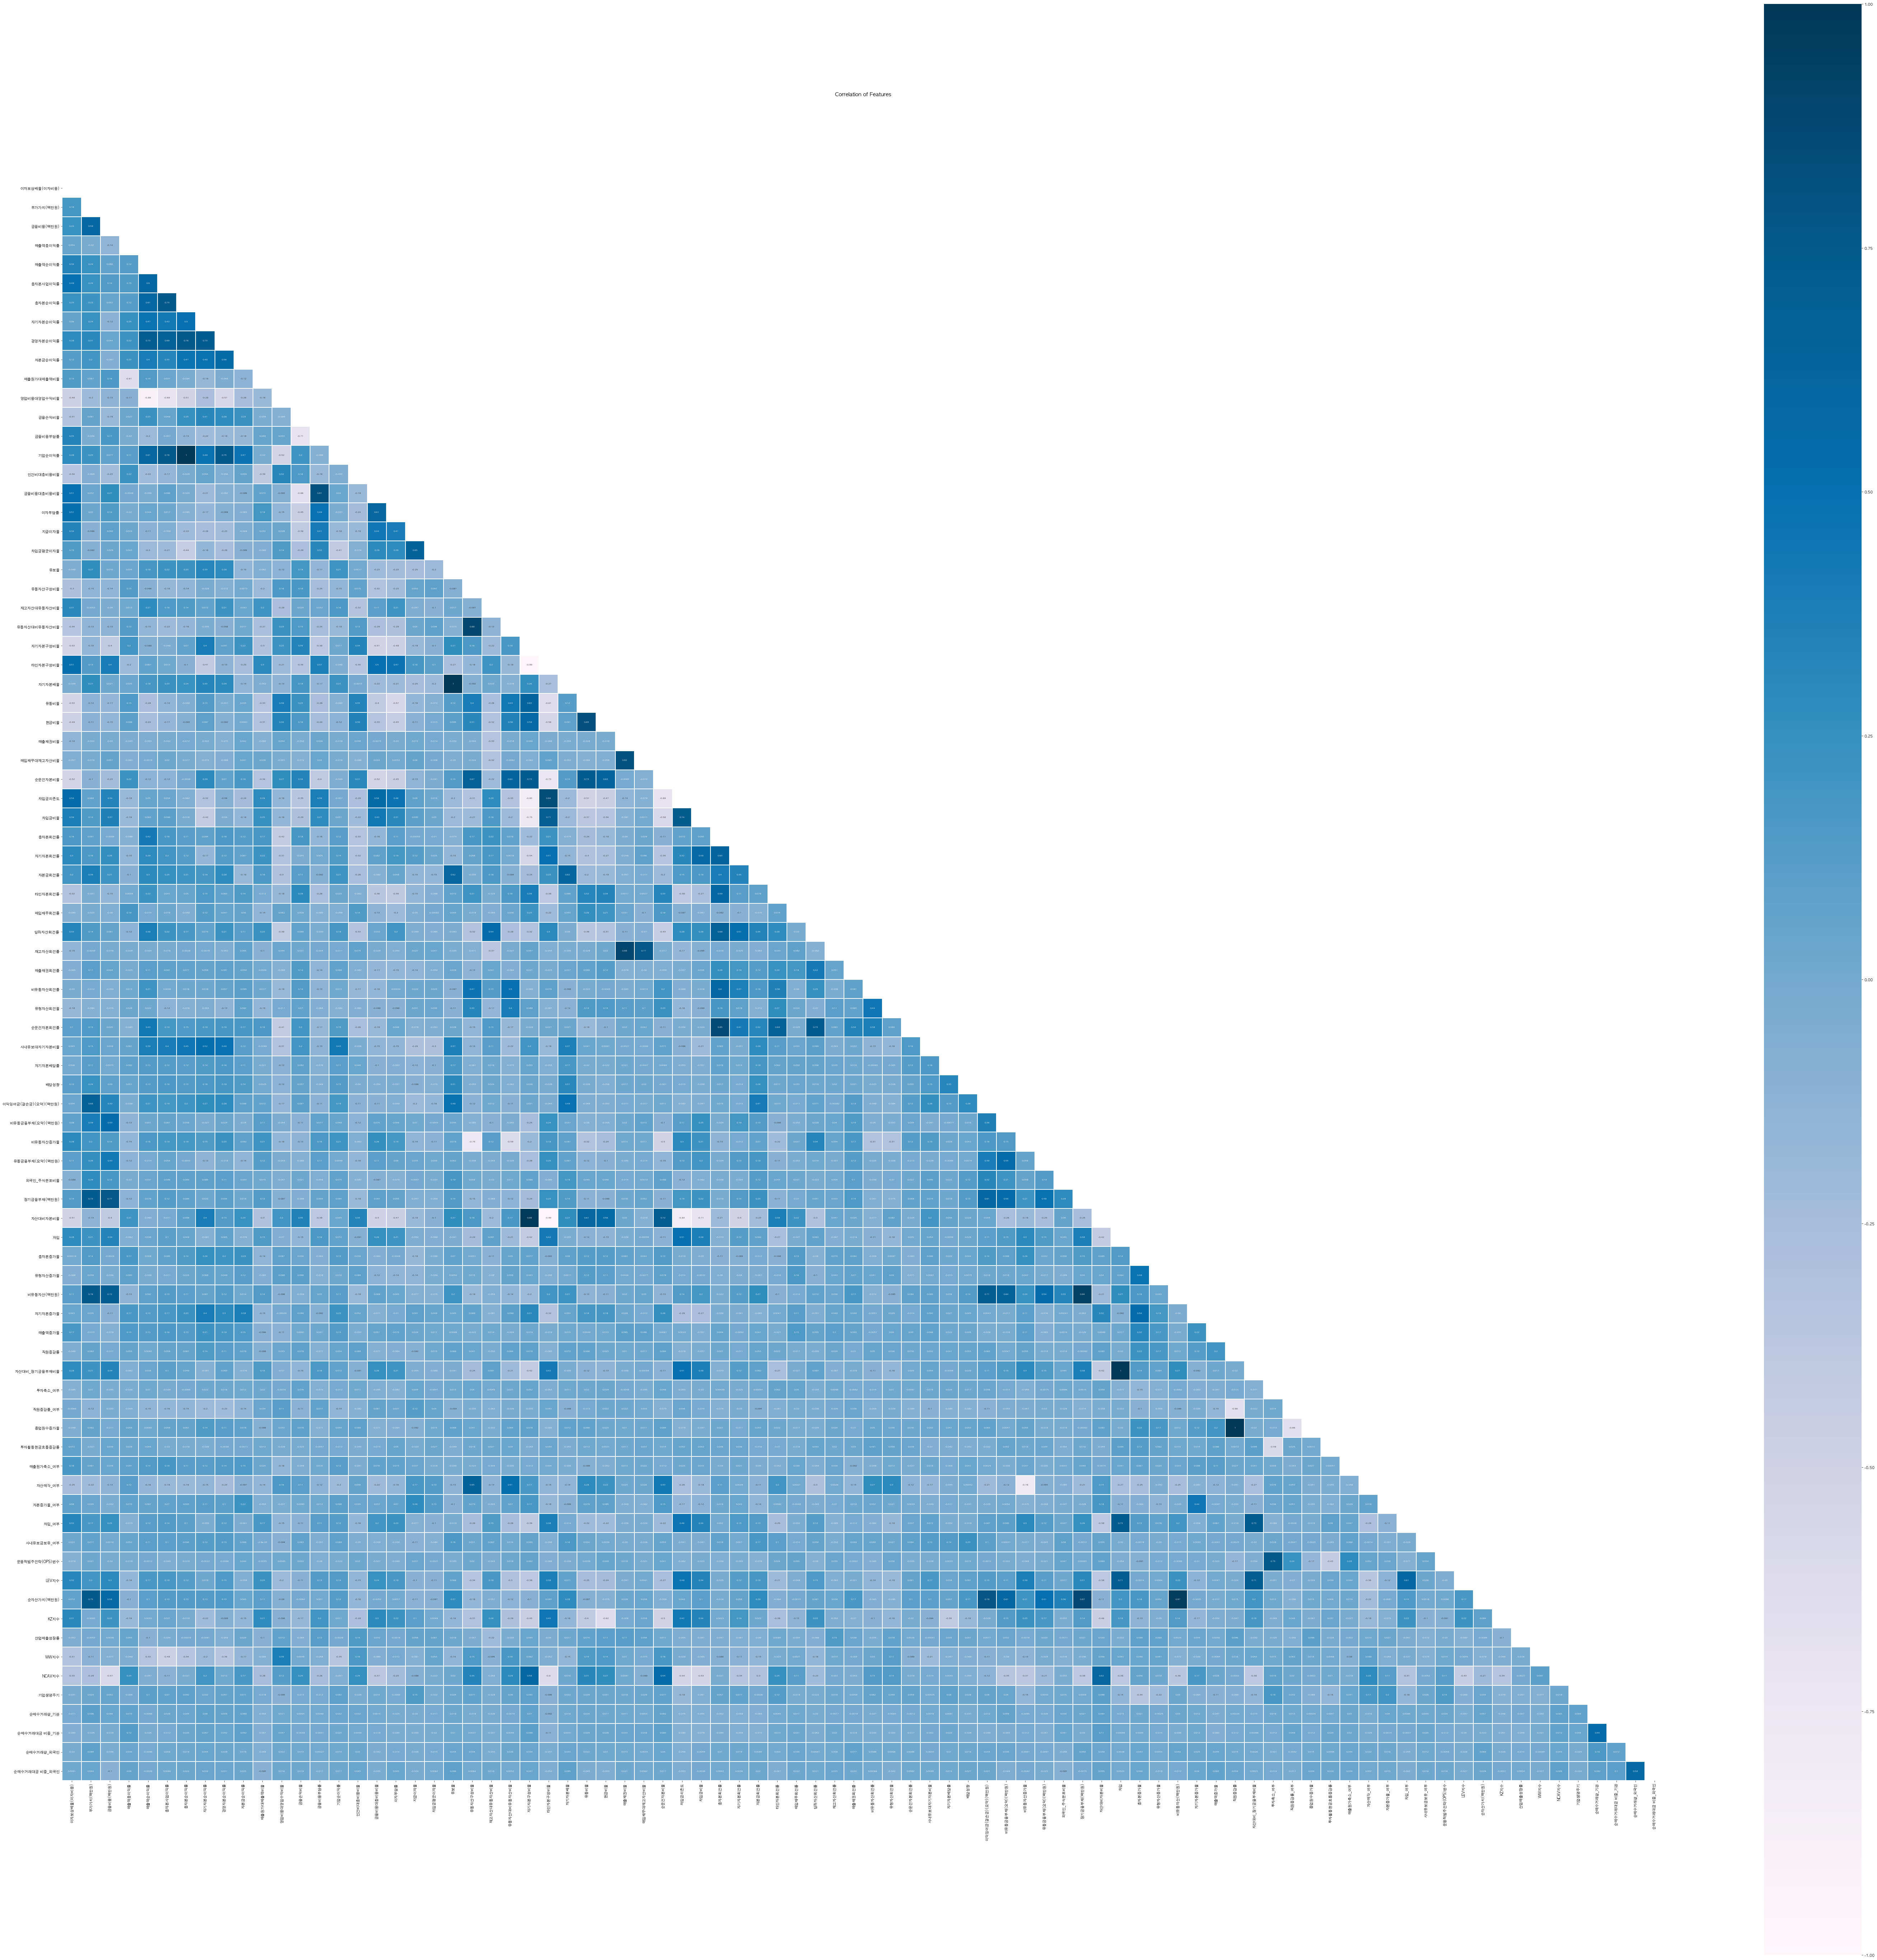

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

# plt.rcParams['font.family'] = 'Malgun Gothic'
df_corr = x_scaled_stan.corr()

mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


colormap = plt.cm.PuBu
plt.figure(figsize=(100, 100))
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='AppleGothic')
plt.title("Correlation of Features", y = 1.05, size = 15)
sns.heatmap(x_scaled_stan.astype(float).corr(), linewidths = 0.1, mask=mask ,vmax = 1.0, 
            vmin= -1.0 , square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 6})

#### 정규성검정 만족하는 컬럼 확인

In [13]:
# 정규성 검정을 하나의 함수로
from scipy.stats import shapiro, anderson, kstest, jarque_bera, normaltest

def normal_test(test_name,x):
    normal = []
    notnormal = []
    if test_name == 'shapiro':
        for var in x.columns :
            stat, p  = shapiro(x[var].values)
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
                
    elif test_name == 'anderson':
        for var in x.columns :
            result  = anderson(x[var].values,dist='norm')
            normality = 0
            for i in range(len(result.critical_values)):
                # sl, cv = result.significance_level[i], result.critical_values[i]
                if result.statistic < result.critical_values[i]:
                    normality +=1
                else :
                    normality +=0
            if normality > 2.5 :
                normal.append(var)
            else :
                notnormal.append(var)
                
    elif test_name == 'kstest':
        for var in x.columns :
            stat,p  = kstest(x[var].values, "norm")
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
    
    elif test_name == 'jarque_bera':
        for var in x.columns :
            stat,p  = jarque_bera(x[var].values)
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
                
    elif test_name == 'normaltest':
        for var in x.columns :
            stat, p  = normaltest(x[var].values)
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
    else:
        pass
    return pd.DataFrame(normal, columns = ['normal']),pd.DataFrame(notnormal, columns = ['notnormal'])

In [14]:
# 1) shapiro
## normal
## 귀무가설을 기각하지 못했다 -> 정규분포를 따른다
## notnormal
## 귀무가설을 기각 대립가설 채택 -> data 분포가 정규분포를 따르지 않는다.
normal_s,notnormal_s = normal_test('shapiro',x_scaled_stan)
normal_s

Empty DataFrame
Columns: [normal]
Index: []

In [15]:
# 2) anderson test
normal_a,notnormal_a = normal_test('anderson',x_scaled_stan)
normal_a

Empty DataFrame
Columns: [normal]
Index: []

In [16]:
# 3) ks test
normal_ks,notnormal_ks = normal_test('kstest',x_scaled_stan)
normal_ks

normal
0  유동자산구성비율
1  타인자본구성비율
2  자산대비자본비율

In [17]:
# 4) jarque_bera test
normal_jb,notnormal_jb = normal_test('jarque_bera',x_scaled_stan)
normal_jb

Empty DataFrame
Columns: [normal]
Index: []

In [18]:
# 5) normaltest
normal_n,notnormal_n = normal_test('normaltest',x_scaled_stan)
normal_n

Empty DataFrame
Columns: [normal]
Index: []

## 1. 등분산 검정

In [19]:
x_등분산 = pd.concat([x_scaled_stan, y_scale], axis=1)
x_등분산

이자보상배율(이자비용)  부가가치(백만원)  금융비용(백만원)   매출액총이익률   매출액순이익률  총자본사업이익률  \
0        0.301414  -0.250111  -0.343619 -0.369394  0.418302  0.338727   
1        0.589858  -0.043915  -0.314997  0.058636  0.491374  0.555950   
2        0.396899   5.003844   1.392957 -0.703051  0.454647  0.407273   
3        0.788784  -0.133667  -0.290261  1.861479  0.546465  0.681457   
4        0.242731  -0.047464  -0.202381 -0.776114  0.453882  0.326176   
..            ...        ...        ...       ...       ...       ...   
776      0.714187  -0.212229  -0.146894 -0.280500  0.515476  0.501886   
777     -2.177210  -0.329019  -0.394221  2.719976 -0.050160  0.126331   
778     -2.177210  -0.380232  -0.379251  1.262967 -4.229596 -3.747961   
779     -1.554570  -0.361719  -0.396441  2.719976 -3.321555 -0.755111   
780     -1.992208  -0.329241  -0.382514  0.800840  0.274263  0.139847   

      총자본순이익률  자기자본순이익률  경영자본순이익률   자본금순이익률  ...      KZ지수   산업매출성장률  \
0    0.281416  0.416472  0.451576  0.690109  ...  0.240357  0.674352   
1    0.496911  0.653769  0.707628  0.664414  ...  0.530084  0.728829   
2    0.355759  0.420055  0.476277 -0.651512  ...  1.465571 -1.386832   
3    0.563218  0.712749  0.790167  0.810900  ... -2.498029  0.437058   
4    0.412522  0.278944  0.411210  0.491826  ...  0.678830  0.040783   
..        ...       ...       ...       ...  ...       ...       ...   
776  0.504446  0.550416  0.707025  0.252418  ... -0.060959  0.347407   
777  0.211593  0.493366  0.361807  0.094309  ... -2.045200  0.437058   
778 -1.625895 -0.563585 -1.898677 -0.117637  ... -2.128225 -0.511188   
779 -0.008925  0.376784 -0.173190  0.424735  ...  0.754328 -0.511188   
780  0.498418  0.661761  0.687143  0.690313  ... -1.594849  0.347407   

         WW지수    NCAV지수    기업생명주기  순매수거래량_기관  순매수거래대금 비중_기관  순매수거래량_외국인  \
0   -0.500688  0.444561 -0.397848   0.097270       0.170875    0.552711   
1   -0.081035  0.515968 -1.112144   0.121588       0.540234   -0.017030   
2   -0.181475 -0.466930 -0.397848  -1.729511      -2.661666   -0.081008   
3   -0.339689  0.264090 -1.112144   0.096403       0.171706   -0.101797   
4   -0.326651 -1.274035 -1.112144  -1.119178      -0.389287   -0.977126   
..        ...       ...       ...        ...            ...         ...   
776 -1.169305  0.396668 -0.397848   0.104712       0.228768   -0.137005   
777  0.001992  0.747973 -1.112144   0.123627       0.720781    0.010724   
778  2.921439  0.477145  1.030745   0.097138       0.167974   -0.023645   
779  0.969057  0.598277 -1.112144   0.097138       0.167974   -0.094099   
780 -0.090214  0.510443 -1.112144   0.087632       0.157445   -0.052451   

     순매수거래대금 비중_외국인  한계기업여부  
0          0.495257       1  
1          0.124305       1  
2          0.273672       0  
3         -0.479703       1  
4         -0.598424       0  
..              ...     ...  
776       -1.678050       1  
777       -0.224976       1  
778       -0.293616       1  
779       -0.426234       1  
780       -0.289971       1  

[781 rows x 85 columns]

In [20]:
# H가 1인 경우 이분산성 / H가 0인 경우 등분산성
from scipy.stats import bartlett
def bartlett_test(col, p_value = 0.05, H = 1):
    list= []
    for i in col:
        T, p_val =bartlett(x_등분산[x_등분산['한계기업여부']==1][i], x_등분산[x_등분산['한계기업여부']==0][i]) 
        list.append([i, p_val])

    list = pd.DataFrame(list, columns = ['변수', 'p_value'])
    if H == 1:
        a = list[(list['p_value'] < p_value)][['변수', 'p_value']].sort_values('p_value')
        return a
    else:
        a = list[(list['p_value'] >= p_value)][['변수', 'p_value']].sort_values('p_value')
        return a

In [21]:
# 이분산성 변수
x_hetero = bartlett_test(x_scaled_stan.columns, H = 1)
x_hetero

변수       p_value
82           순매수거래량_외국인  4.396146e-48
6               총자본순이익률  1.253490e-45
14               기업순이익률  1.663936e-44
46              자기자본배당률  1.401544e-43
11          영업비용대영업수익비율  4.789030e-38
17                이자부담률  4.467863e-30
5              총자본사업이익률  1.519099e-27
19             차입금평균이자율  1.007453e-24
13              금융비용부담률  1.922359e-24
4               매출액순이익률  1.223714e-23
7              자기자본순이익률  5.600574e-18
81        순매수거래대금 비중_기관  1.041824e-15
45          사내유보대자기자본비율  3.670862e-13
48  이익잉여금(결손금)(요약)(백만원)  1.569756e-12
37              타인자본회전률  3.797527e-12
27                 유동비율  4.842984e-12
57              유형자산증가율  7.392644e-12
12               금융손익비율  1.027488e-11
8              경영자본순이익률  1.037990e-11
52           외국인_주식분포비율  2.359800e-11
71           사내유보금보유_여부  2.507768e-09
42             비유동자산회전률  7.095659e-09
36               자본금회전률  1.099904e-08
16           금융비용대총비용비율  3.541153e-08
30          매입채무대재고자산비율  1.688720e-07
44             순운전자본회전률  3.882174e-07
80            순매수거래량_기관  4.423149e-07
47                 배당성향  8.840362e-07
28                 현금비율  2.086077e-06
64             직원증감률_여부  1.493185e-05
26               자기자본배율  2.531537e-05
20                  유보율  3.483393e-05
65              종업원수증가율  3.775032e-05
61                직원증감률  3.775032e-05
35              자기자본회전률  5.403519e-05
60               매출액증가율  6.836519e-05
10           매출원가대매출액비율  7.991825e-05
2             금융비용(백만원)  2.376170e-04
31              순운전자본비율  5.596929e-04
1             부가가치(백만원)  5.626939e-04
74           순자산가치(백만원)  6.732903e-04
15            인건비대총비용비율  1.672223e-03
56               총자본증가율  1.675098e-03
18                지급이자율  3.632748e-03
77                 WW지수  5.391991e-03
59              자기자본증가율  5.500389e-03
67            매출원가축소_여부  1.005157e-02
58           비유동자산(백만원)  1.350023e-02
41              매출채권회전률  1.497725e-02
23         유동자산대비유동자산비율  1.551721e-02
3               매출액총이익률  2.596573e-02
62        자산대비_장기금융부채비율  3.106755e-02
55                   차입  3.106755e-02
21             유동자산구성비율  3.803744e-02

In [22]:
# 등분산성 변수
x_homo = bartlett_test(x_scaled_stan.columns, H = 0)
x_homo

변수   p_value
29            매출채권비율  0.075762
49  비유동금융부채(요약)(백만원)  0.090874
76           산업매출성장률  0.111608
54          자산대비자본비율  0.112630
73             LEV지수  0.114822
83    순매수거래대금 비중_외국인  0.124557
25          타인자본구성비율  0.137268
40           재고자산회전률  0.141675
79            기업생명주기  0.141932
75              KZ지수  0.144437
53       장기금융부채(백만원)  0.165200
34            총자본회전률  0.236670
39           당좌자산회전률  0.261752
69          자본증가율_여부  0.308625
72    운용적범주전략(OPS)변수  0.312113
32            차입금의존도  0.374475
33             차입금비율  0.421649
51   유동금융부채(요약)(백만원)  0.447636
63           투자축소_여부  0.469476
24          자기자본구성비율  0.492456
66       투자활동현금흐름증감률  0.503221
22       재고자산대유동자산비율  0.541953
43           유형자산회전율  0.588560
9            자본금순이익률  0.636365
0       이자보상배율(이자비용)  0.778256
68           자산매각_여부  0.798638
78            NCAV지수  0.882279
50          비유동자산증가율  0.913229
70             차입_여부  0.936478
38           매입채무회전률  0.976911

## 2. t-test

In [23]:
# 2) t_test
import scipy.stats as stats
def t_test(col, col_h0, col_h1, p_value = 0.05):
    list= []
    for i in col:
        if (col_h0['변수']==i).any():
            t_stat, p_val = stats.ttest_ind(x_등분산[x_등분산['한계기업여부']==1][i], x_등분산[x_등분산['한계기업여부']==0][i], equal_var=True)
            list.append([i, p_val])
        elif (col_h1['변수']==i).any():
            t_stat, p_val = stats.ttest_ind(x_등분산[x_등분산['한계기업여부']==1][i], x_등분산[x_등분산['한계기업여부']==0][i], equal_var=False)
            list.append([i, p_val])

    list = pd.DataFrame(list, columns = ['변수', 'p_value'])
    a = list[(list['p_value'] < p_value)][['변수', 'p_value']].sort_values('p_value')
    return a

In [24]:
# 2) t_test 결과 p_value < 0.05보다 작은 유의한 변수 가져오기
x_ttest = t_test(x_scaled_stan.columns, x_homo, x_hetero, p_value=0.05)
print("유의한 피쳐 수 :", len(x_ttest))
x_ttest.sort_values(by="변수", ascending=True)

유의한 피쳐 수 : 31


변수       p_value
75                 KZ지수  1.889767e-02
77                 WW지수  3.133570e-05
8              경영자본순이익률  1.754108e-09
16           금융비용대총비용비율  9.288653e-04
13              금융비용부담률  2.455083e-03
12               금융손익비율  5.856866e-03
14               기업순이익률  1.101867e-07
4               매출액순이익률  3.713907e-10
67            매출원가축소_여부  6.781113e-03
1             부가가치(백만원)  1.621177e-02
42             비유동자산회전률  1.773670e-02
45          사내유보대자기자본비율  9.269827e-08
44             순운전자본회전률  8.759069e-04
11          영업비용대영업수익비율  1.141469e-11
20                  유보율  2.868966e-04
57              유형자산증가율  2.036891e-02
48  이익잉여금(결손금)(요약)(백만원)  4.489784e-04
46              자기자본배당률  1.715393e-02
26               자기자본배율  2.922410e-04
7              자기자본순이익률  2.439928e-08
35              자기자본회전률  1.150949e-02
36               자본금회전률  4.662692e-06
18                지급이자율  3.580549e-03
64             직원증감률_여부  1.290133e-03
32               차입금의존도  5.012561e-03
19             차입금평균이자율  1.251439e-05
5              총자본사업이익률  1.534215e-09
6               총자본순이익률  2.027599e-08
34               총자본회전률  1.512466e-04
37              타인자본회전률  3.096516e-02
66          투자활동현금흐름증감률  4.536620e-02

In [25]:
ttest_col = list(x_ttest["변수"])
# ttest_col

In [26]:
# # ttest 다른 방법 : Logit Ttest
# import statsmodels.api as sm

# # 상수항 추가
# x_ = sm.add_constant(x_scaled_stan, has_constant = "add")

# # 회귀모델 적합
# multi_model1 = sm.Logit(x_등분산[['회생여부']], x_)
# fitted_multi_model1 = multi_model1.fit()

# # 결과 출력
# fitted_multi_model1.summary()

## 3. VIF

In [27]:
col_유의 = list(x_ttest["변수"])
X_train_유의 = x_scaled_stan[col_유의]

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 출력을 위한 데이터 프레임 형성
vif = pd.DataFrame()

# VIF 값과 각 Feature 이름에 대해 설정
vif["VIF Factor"] = [variance_inflation_factor(X_train_유의.values, i) for i in range(X_train_유의.shape[1])]
vif["features"] = X_train_유의.columns 

# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

VIF Factor             features
0   1316.680295              총자본순이익률
1   1312.125908               기업순이익률
2    209.819002               자기자본배율
3    204.434091                  유보율
4     13.248616              매출액순이익률
5     12.346104          영업비용대영업수익비율
6     10.890229               총자본회전률
7      7.751534           금융비용대총비용비율
8      6.354960             순운전자본회전률
9      6.279743             경영자본순이익률
10     5.891192             총자본사업이익률
11     4.054529              금융비용부담률
12     3.677453               자본금회전률
13     3.595729             자기자본순이익률
14     3.473341               차입금의존도
15     3.133546              타인자본회전률
16     2.866674                지급이자율
17     2.726705              자기자본회전률
18     2.476362               금융손익비율
19     2.438440  이익잉여금(결손금)(요약)(백만원)
20     2.358259             차입금평균이자율
21     2.264337            부가가치(백만원)
22     2.047882             비유동자산회전률
23     1.775143          사내유보대자기자본비율
24     1.654346                 KZ지수
25     1.393357                 WW지수
26     1.322053              자기자본배당률
27     1.102085              유형자산증가율
28     1.091597             직원증감률_여부
29     1.085833            매출원가축소_여부
30     1.064395          투자활동현금흐름증감률

## 4. Wrapper방법

### 4-2. Stepwise

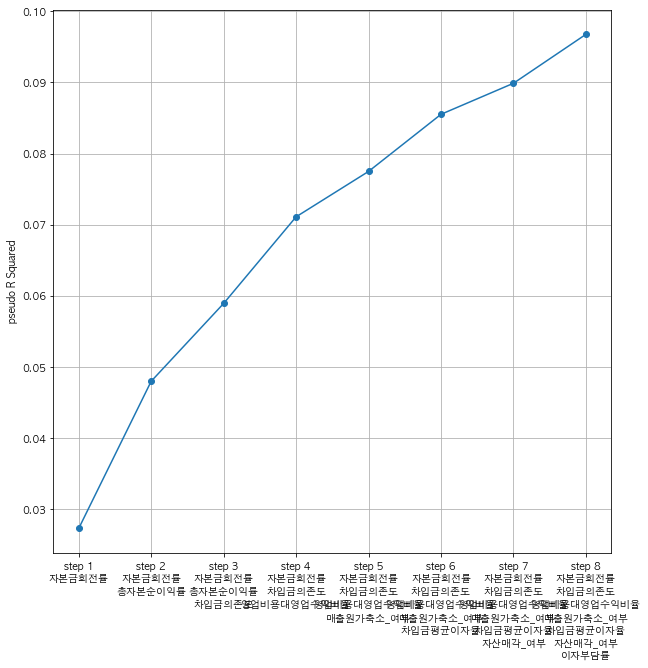

In [29]:
def stepwise_feature_selection(feature, target, variables):
    import statsmodels.api as sm
    import matplotlib.pyplot as plt
    import warnings
    import pandas as pd
    warnings.filterwarnings("ignore")
    
    y = target ## 반응 변수

    selected_variables = [] ## 선택된 변수들
    sl_enter = 0.05
    sl_remove = 0.05
    
    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    r_squared = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    while len(variables) > 0:
        remainder = list(set(variables) - set(selected_variables))
        pval = pd.Series(index=remainder) ## 변수의 p-value
        ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서
        ## 선형 모형을 적합한다.
        for col in remainder: 
            X = feature[selected_variables+[col]]
            X = sm.add_constant(X)
            model = sm.Logit(y,X).fit(disp=0)
            pval[col] = model.pvalues[col]
    
        min_pval = pval.min()
        if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
            selected_variables.append(pval.idxmin())
            ## 선택된 변수들에대해서
            ## 어떤 변수를 제거할지 고른다.
            while len(selected_variables) > 0:
                selected_X = feature[selected_variables]
                selected_X = sm.add_constant(selected_X)
                selected_pval = sm.Logit(y,selected_X).fit(disp=0).pvalues[1:]
                max_pval = selected_pval.max()
                if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                    remove_variable = selected_pval.idxmax()
                    selected_variables.remove(remove_variable)
                else:
                    break
            
            step += 1
            steps.append(step)
            presudo_r_squared = sm.Logit(y,sm.add_constant(feature[selected_variables])).fit(disp=0).prsquared
            r_squared.append(presudo_r_squared)
            sv_per_step.append(selected_variables.copy())
        else:
            break

    
    # 시각화
    fig = plt.figure(figsize=(10,10))
    plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)])
    plt.plot(steps,r_squared, marker='o')
    plt.ylabel('pseudo R Squared')
    plt.grid(True)
    plt.show()

    return selected_variables
    
selected_variables = stepwise_feature_selection(x_scaled_stan, y_scale, x_scaled_stan.columns.tolist())

In [30]:
print(len(selected_variables))
selected_variables

7


['자본금회전률',
 '차입금의존도',
 '영업비용대영업수익비율',
 '매출원가축소_여부',
 '차입금평균이자율',
 '자산매각_여부',
 '이자부담률']

## 5. Embbeded Methods

### 5-1. Lasso

In [31]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.simplefilter('ignore')

lasso_model = LogisticRegression()
param_grid = {'penalty' : ['l1'], 
                'C' : [0.001, 0.01, 0.1, 1, 2, 5, 10],
                'solver' : ['liblinear']}

grid_search = GridSearchCV(lasso_model, param_grid=param_grid, return_train_score=True, cv=5)
grid_search.fit(x_scaled_stan, y_scale)

df = pd.DataFrame(grid_search.cv_results_)
df = df.sort_values(by=['rank_test_score'], ascending=True)
df[['params', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
print('GridSearchCV 최적 파라미터:', grid_search.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_search.best_score_))

GridSearchCV 최적 파라미터: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
GridSearchCV 최고 정확도:0.7196


In [32]:
lasso_best = LogisticRegression(C=0.05,penalty='l1',solver='liblinear').fit(x_scaled_stan, y_scale)

df_lasso = pd.DataFrame()
df_lasso['feature'] = x_scaled_stan.columns
df_lasso['coef'] = lasso_best.coef_[0]
df_lasso.drop(df_lasso[df_lasso['coef']==0].index, inplace=True)
df_lasso

feature      coef
7              자기자본순이익률 -0.029350
8              경영자본순이익률 -0.030884
11          영업비용대영업수익비율  0.176929
19             차입금평균이자율  0.067723
21             유동자산구성비율 -0.014685
30          매입채무대재고자산비율 -0.000886
32               차입금의존도  0.119380
34               총자본회전률 -0.017842
35              자기자본회전률 -0.011186
36               자본금회전률 -0.162023
45          사내유보대자기자본비율 -0.058247
46              자기자본배당률 -0.026638
48  이익잉여금(결손금)(요약)(백만원) -0.036250
57              유형자산증가율  0.012486
64             직원증감률_여부  0.031493
66          투자활동현금흐름증감률  0.014566
67            매출원가축소_여부 -0.074043
68              자산매각_여부 -0.020982
77                 WW지수  0.062847

In [33]:
# 라쏘에서 선택된 피처
lasso_features = df_lasso['feature'].values.tolist()
print('Lasso에서 선택된 피처 수 {0:1.0f}'.format(len(df_lasso)), '개')
lasso_features

Lasso에서 선택된 피처 수 19 개


['자기자본순이익률',
 '경영자본순이익률',
 '영업비용대영업수익비율',
 '차입금평균이자율',
 '유동자산구성비율',
 '매입채무대재고자산비율',
 '차입금의존도',
 '총자본회전률',
 '자기자본회전률',
 '자본금회전률',
 '사내유보대자기자본비율',
 '자기자본배당률',
 '이익잉여금(결손금)(요약)(백만원)',
 '유형자산증가율',
 '직원증감률_여부',
 '투자활동현금흐름증감률',
 '매출원가축소_여부',
 '자산매각_여부',
 'WW지수']

## 6. Filter Method

### selectKBest
: 각 피처와 타겟 사이에 통계적 관계(상관계수)를 계산 후, 유의미하다고 판단되는 피처를 선택하는 방식, 피처 선택 후 따로 모델 적용이 필요가 없다.

In [34]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

f_classif_selector = SelectKBest(f_classif, k=13)
f_classif_selector.fit(x_scaled_stan, y_scale)

f_classif_scores = pd.DataFrame()
f_classif_scores['Feature'] = x_scaled_stan.columns
f_classif_scores['Support'] = f_classif_selector.get_support()
f_classif_scores[f_classif_scores["Support"]==True]

Feature  Support
4               매출액순이익률     True
5              총자본사업이익률     True
6               총자본순이익률     True
7              자기자본순이익률     True
8              경영자본순이익률     True
11          영업비용대영업수익비율     True
14               기업순이익률     True
20                  유보율     True
26               자기자본배율     True
36               자본금회전률     True
45          사내유보대자기자본비율     True
48  이익잉여금(결손금)(요약)(백만원)     True
77                 WW지수     True

In [35]:
list_kbest = list(f_classif_scores[f_classif_scores["Support"]==True]["Feature"])
print(len(list_kbest))
list_kbest

13


['매출액순이익률',
 '총자본사업이익률',
 '총자본순이익률',
 '자기자본순이익률',
 '경영자본순이익률',
 '영업비용대영업수익비율',
 '기업순이익률',
 '유보율',
 '자기자본배율',
 '자본금회전률',
 '사내유보대자기자본비율',
 '이익잉여금(결손금)(요약)(백만원)',
 'WW지수']

## 7. 중복 2번 Feature

In [36]:
# ttest_col
# selected_variables
# lasso_features
# list_kbest

list_ttest = list(ttest_col)
list_stepwise = list(selected_variables)
list_lasso = list(lasso_features)
list_kbest = list(list_kbest)
list_col_all = pd.Series(df_부실징후.drop(["회사명","거래소코드","회계년도","한계기업여부"], axis=1).columns)

In [37]:
def func_ttest(x):
    if x in list_ttest:
        return 1
    else:
        return 0

def func_stepwise(x):
    if x in list_stepwise:
        return 1
    else:
        return 0

def func_lasso(x):
    if x in list_lasso:
        return 1
    else:
        return 0

def func_kbest(x):
    if x in list_kbest:
        return 1
    else:
        return 0

In [38]:
feature_counts = pd.DataFrame()
feature_counts['Feature'] = list_col_all
feature_counts['ttest'] = list_col_all.map(func_ttest)
feature_counts['stepwise'] = list_col_all.map(func_stepwise)
feature_counts['lasso'] = list_col_all.map(func_lasso)
feature_counts['kbest'] = list_col_all.map(func_kbest)

feature_counts["total"] = feature_counts["ttest"]+feature_counts["stepwise"]+feature_counts["lasso"]+feature_counts["kbest"]
feature_final = feature_counts[feature_counts["total"]>=2]
list_feature_final = list(feature_final["Feature"])
print("선택된 피쳐수 :", len(list_feature_final))
feature_final


선택된 피쳐수 : 23


Feature  ttest  stepwise  lasso  kbest  total
4               매출액순이익률      1         0      0      1      2
5              총자본사업이익률      1         0      0      1      2
6               총자본순이익률      1         0      0      1      2
7              자기자본순이익률      1         0      1      1      3
8              경영자본순이익률      1         0      1      1      3
11          영업비용대영업수익비율      1         1      1      1      4
14               기업순이익률      1         0      0      1      2
19             차입금평균이자율      1         1      1      0      3
20                  유보율      1         0      0      1      2
26               자기자본배율      1         0      0      1      2
32               차입금의존도      1         1      1      0      3
34               총자본회전률      1         0      1      0      2
35              자기자본회전률      1         0      1      0      2
36               자본금회전률      1         1      1      1      4
45          사내유보대자기자본비율      1         0      1      1      3
46              자기자본배당률      1         0      1      0      2
48  이익잉여금(결손금)(요약)(백만원)      1         0      1      1      3
57              유형자산증가율      1         0      1      0      2
64             직원증감률_여부      1         0      1      0      2
66          투자활동현금흐름증감률      1         0      1      0      2
67            매출원가축소_여부      1         1      1      0      3
68              자산매각_여부      0         1      1      0      2
77                 WW지수      1         0      1      1      3

---
# Modeling

## 1. Feature Select

In [39]:
df_부실징후.head(5)

회사명   거래소코드    회계년도  한계기업여부  이자보상배율(이자비용)  부가가치(백만원)  금융비용(백만원)  \
0  케이알모터스(주)  000040  2013.0       1         -4.29    9379.15     603.89   
1  성창기업지주(주)  000180  2013.0       1         -1.39   28423.83    1111.80   
2      디엘(주)  000210  2014.0       0         -3.33  494645.17   31419.37   
3   일동홀딩스(주)  000230  2017.0       1          0.61   20134.11    1550.73   
4   (주)대유플러스  000300  2012.0       0         -4.88   28096.06    3110.15   

   매출액총이익률  매출액순이익률  총자본사업이익률  ...  순자산가치(백만원)          KZ지수   산업매출성장률  \
0     7.59    -6.64     -2.77  ...     57315.0 -8.591876e+10  8.405309   
1    14.62    -2.82     -0.52  ...    253423.0 -4.619692e+10  8.684003   
2     2.11    -4.74     -2.06  ...   2648892.0  8.205913e+10 -2.139125   
3    44.23     0.06      0.78  ...    174057.0 -4.613540e+11  7.191381   
4     0.91    -4.78     -2.90  ...    101198.0 -2.580369e+10  5.164151   

           WW지수    NCAV지수  기업생명주기  순매수거래량_기관  순매수거래대금 비중_기관  순매수거래량_외국인  \
0 -6.576044e+08  0.001550       1      154.0       0.000010    666080.0   
1  2.632381e+09  0.106379       0    28438.0       0.001337    -43268.0   
2  1.844954e+09 -1.336562       1 -2124518.0      -0.010160   -122922.0   
3  6.045934e+08 -0.263390       0     -854.0       0.000013   -148806.0   
4  7.068060e+08 -2.521432       0 -1414659.0      -0.002001  -1238620.0   

   순매수거래대금 비중_외국인  
0        0.001283  
1        0.000147  
2        0.000605  
3       -0.001702  
4       -0.002065  

[5 rows x 88 columns]

In [40]:
# ttest_col # ttest 피쳐
# selected_variables # stepwise 피쳐
# lasso_features # lasso 피쳐
# list_kbest # kbest 피쳐
# list_feature_final # 2번 중복 피쳐

df_modeling = df_부실징후[["거래소코드","회계년도","한계기업여부","이자보상배율(이자비용)"] + list_feature_final]

In [41]:
print("최종 피쳐 수", len(list_feature_final)+1)
list_feature_final

최종 피쳐 수 24


['매출액순이익률',
 '총자본사업이익률',
 '총자본순이익률',
 '자기자본순이익률',
 '경영자본순이익률',
 '영업비용대영업수익비율',
 '기업순이익률',
 '차입금평균이자율',
 '유보율',
 '자기자본배율',
 '차입금의존도',
 '총자본회전률',
 '자기자본회전률',
 '자본금회전률',
 '사내유보대자기자본비율',
 '자기자본배당률',
 '이익잉여금(결손금)(요약)(백만원)',
 '유형자산증가율',
 '직원증감률_여부',
 '투자활동현금흐름증감률',
 '매출원가축소_여부',
 '자산매각_여부',
 'WW지수']

## 2. Scaling

In [42]:
from sklearn.preprocessing import StandardScaler

y_train_scaling = df_modeling[["한계기업여부", "회계년도"]]
X_train_scaling = df_modeling.drop(["거래소코드", "한계기업여부", "회계년도"],axis=1)

# StandardScaler객체 생성
scaler_stan = StandardScaler()
scaler_stan.fit(X_train_scaling)
data_scaled_stan = scaler_stan.transform(X_train_scaling)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
x_scaled_stan = pd.DataFrame(data = data_scaled_stan, columns=X_train_scaling.columns)
x_scaled_stan

y_train_scaling.reset_index(drop=True, inplace=True)
x_scaled_stan.reset_index(drop=True, inplace=True)

df_modeling = pd.concat([y_train_scaling,x_scaled_stan], axis=1)
df_modeling.reset_index(drop=True, inplace=True)

In [43]:

# from sklearn.preprocessing import MinMaxScaler

# y_train_scaling = df_modeling[["한계기업여부", "회계년도"]]
# X_train_scaling = df_modeling.drop(["거래소코드", "한계기업여부", "회계년도"],axis=1)

# # StandardScaler객체 생성
# scaler_stan = MinMaxScaler()
# scaler_stan.fit(X_train_scaling)
# data_scaled_stan = scaler_stan.transform(X_train_scaling)

# # transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
# x_scaled_stan = pd.DataFrame(data = data_scaled_stan, columns=X_train_scaling.columns)
# x_scaled_stan

# y_train_scaling.reset_index(drop=True, inplace=True)
# x_scaled_stan.reset_index(drop=True, inplace=True)

# df_modeling = pd.concat([y_train_scaling,x_scaled_stan], axis=1)
# df_modeling.reset_index(drop=True, inplace=True)

In [44]:
# from sklearn.preprocessing import RobustScaler

# y_train_scaling = df_modeling[["한계기업여부", "회계년도"]]
# X_train_scaling = df_modeling.drop(["거래소코드","한계기업여부", "회계년도"],axis=1)

# # StandardScaler객체 생성
# scaler_robust = RobustScaler()
# scaler_robust.fit(X_train_scaling)
# data_scaled_robust = scaler_robust.transform(X_train_scaling)

# # transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
# x_scaled_robust = pd.DataFrame(data = data_scaled_robust, columns=X_train_scaling.columns)
# x_scaled_robust

# y_train_scaling.reset_index(drop=True, inplace=True)
# x_scaled_robust.reset_index(drop=True, inplace=True)

# df_modeling = pd.concat([y_train_scaling,x_scaled_robust], axis=1)
# df_modeling.reset_index(drop=True, inplace=True)

In [45]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import warnings
# warnings.filterwarnings(action='ignore')

# # plt.rcParams['font.family'] = 'Malgun Gothic'
# df_corr = df_modeling.corr()

# mask = np.zeros_like(df_corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True


# colormap = plt.cm.PuBu
# plt.figure(figsize=(100, 100))
# plt.rcParams['axes.unicode_minus'] = False
# plt.rc('font', family='AppleGothic')
# plt.title("Correlation of Features", y = 1.05, size = 15)
# sns.heatmap(df_modeling.astype(float).corr(), linewidths = 0.1, mask=mask ,vmax = 1.0, 
#             vmin= -1.0 , square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 6})

## 3. PCA(안씀)

In [46]:
# df_modeling

In [47]:
# df_PCA_non = df_modeling[["회계년도","회생여부"]]
# df_PCA = df_modeling.drop(["회계년도","회생여부"], axis=1)

In [48]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=8, random_state=100)
# df_PCA = pd.DataFrame(pca.fit_transform(df_PCA))
# df_modeling = pd.concat([df_PCA_non, df_PCA], axis=1)

In [49]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import warnings
# warnings.filterwarnings(action='ignore')

# # plt.rcParams['font.family'] = 'Malgun Gothic'
# df_corr = df_PCA.corr()

# mask = np.zeros_like(df_corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True


# colormap = plt.cm.PuBu
# plt.figure(figsize=(100, 100))
# plt.rcParams['axes.unicode_minus'] = False
# plt.rc('font', family='AppleGothic')
# plt.title("Correlation of Features", y = 1.05, size = 15)
# sns.heatmap(df_PCA.astype(float).corr(), linewidths = 0.1, mask=mask ,vmax = 1.0, 
#             vmin= -1.0 , square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 6})

## 4. Data split

In [50]:
# tain : 2012~2016
train_set = df_modeling[((df_modeling["회계년도"]==2017)|(df_modeling["회계년도"]==2018)).map(func_not)]
train_set.reset_index(drop=True, inplace=True)
y_train = train_set[target]
X_train = train_set.drop(["회계년도", target], axis=1)

# test : 2017, 2018
test_set = df_modeling[((df_modeling["회계년도"]==2017)|(df_modeling["회계년도"]==2018))]
test_set.reset_index(drop=True, inplace=True)
y_test = test_set[target]
X_test = test_set.drop(["회계년도",target], axis=1)

In [51]:
train_set.shape

(607, 26)

In [52]:
test_set.shape

(174, 26)

## 5. Resampling(안씀)

In [72]:
# # 오버샘플링
# from imblearn.over_sampling import SMOTE
# rus = SMOTE(sampling_strategy='auto')
# X_train, y_train = rus.fit_resample(X_train, y_train)

In [73]:
# # 언더샘플링
# from imblearn.under_sampling import RandomUnderSampler
# rus = RandomUnderSampler(random_state=156)
# X_train, y_train = rus.fit_resample(X_train, y_train)

## 6. Modeling

[단일분류]
- Logistic
- KNN
- Decision Tree
- Naive Bayes
- SVM

[Ensamble]
- Random Forest
- XGB
- LGBM
- Voting
- Stacking

[Deeplearning]
- TabNet

In [54]:
# from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, precision_score , f1_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier # 컬럼명 바꿔서 돌려야함(특수문자는 아스키문자로 변환 안됌)

In [80]:
models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    BernoulliNB(),
    SVC(),
    RandomForestClassifier(),
    XGBClassifier(),
]


rdict={'model':[],'acc_train':[], 'auc_train':[], 'acc_val':[],'precision':[],'recall':[],'f1_score':[], 'AUC_val':[]}


for clf in models:
    clf = clf.fit(X_train, y_train)
#1열:Test
    y_hat = clf.predict(X_train)
    results_train  = (round(accuracy_score(y_train,y_hat),2),round(roc_auc_score(y_train,y_hat),2))
#2열:Val
    y_hat = clf.predict(X_test)
    results = (round(accuracy_score(y_test,y_hat),2),
                    round(precision_score(y_test,y_hat),2),
                    round(recall_score(y_test,y_hat),2),
                    round(f1_score(y_test,y_hat),2),
                    round(roc_auc_score(y_test,y_hat),2))

    rdict['model'].append(clf); 
    rdict['acc_train'].append(results_train[0])
    rdict['auc_train'].append(results_train[1])
    
    rdict['acc_val'].append(results[0])
    rdict['precision'].append(results[1])
    rdict['recall'].append(results[2])
    rdict['f1_score'].append(results[3])
    rdict['AUC_val'].append(results[4])   

    print(results_train, results)

rdf3 = pd.DataFrame(data=rdict)
rdf3 

(0.74, 0.55) (0.71, 0.74, 0.9, 0.81, 0.6)
(0.77, 0.66) (0.68, 0.72, 0.87, 0.79, 0.56)
(1.0, 1.0) (0.56, 0.69, 0.66, 0.68, 0.51)
(0.61, 0.63) (0.56, 0.77, 0.52, 0.62, 0.58)
(0.74, 0.53) (0.7, 0.7, 1.0, 0.82, 0.52)
(1.0, 1.0) (0.73, 0.74, 0.95, 0.83, 0.6)
[15:24:58] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
(1.0, 1.0) (0.68, 0.74, 0.82, 0.78, 0.6)


model  acc_train  auc_train  \
0                               LogisticRegression()       0.74       0.55   
1                             KNeighborsClassifier()       0.77       0.66   
2                           DecisionTreeClassifier()       1.00       1.00   
3                                      BernoulliNB()       0.61       0.63   
4                                              SVC()       0.74       0.53   
5  (DecisionTreeClassifier(max_features='sqrt', r...       1.00       1.00   
6  XGBClassifier(base_score=0.5, booster='gbtree'...       1.00       1.00   

   acc_val  precision  recall  f1_score  AUC_val  
0     0.71       0.74    0.90      0.81     0.60  
1     0.68       0.72    0.87      0.79     0.56  
2     0.56       0.69    0.66      0.68     0.51  
3     0.56       0.77    0.52      0.62     0.58  
4     0.70       0.70    1.00      0.82     0.52  
5     0.73       0.74    0.95      0.83     0.60  
6     0.68       0.74    0.82      0.78     0.60

### 1. Logistic

In [81]:
rdict={'model':[], 'i':[], 'j':[], 'ACC':[], 'f1_score':[], 'AUC':[]}
list_c = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
list_penalty = ["l1", "l2"]


for i in list_c:
    for j in list_penalty:
        model = LogisticRegression(C=i, penalty=j, solver="liblinear")
        model.fit(X_train, y_train)
        y_hat = model.predict(X_test)

        rdict['model'].append(model)
        rdict['i'].append(i)
        rdict['j'].append(j)
        rdict['ACC'].append(round(accuracy_score(y_test,y_hat),2))
        rdict['f1_score'].append(round(f1_score(y_test,y_hat),2))
        rdict['AUC'].append(round(roc_auc_score(y_test,y_hat),2))

rdf = pd.DataFrame(data=rdict)
rdf.sort_values(by="AUC", ascending=False, inplace=True) # AUC로
rdf.reset_index(drop=True, inplace=True)
rdf[:5]

model        i   j   ACC  \
0     LogisticRegression(C=0.01, solver='liblinear')     0.01  l2  0.70   
1  LogisticRegression(C=100.0, penalty='l1', solv...   100.00  l1  0.71   
2    LogisticRegression(C=100.0, solver='liblinear')   100.00  l2  0.71   
3  LogisticRegression(C=1000.0, penalty='l1', sol...  1000.00  l1  0.70   
4   LogisticRegression(C=1000.0, solver='liblinear')  1000.00  l2  0.70   

   f1_score   AUC  
0       0.8  0.61  
1       0.8  0.61  
2       0.8  0.61  
3       0.8  0.61  
4       0.8  0.61

In [82]:
model_LR = LogisticRegression(C=0.01, penalty='l2', solver="liblinear")

### 2. KNN

In [83]:
rdict={'model':[], 'i':[], 'j':[], 'k':[], 'ACC':[], 'f1_score':[], 'AUC':[]}
list_n_neighbors = list(range(1,20))
list_weights = ["uniform", "distance"]
list_metric = ['euclidean', 'manhattan', 'minkowski']


for i in list_n_neighbors:
    for j in list_weights:
        for k in list_metric:
            model = KNeighborsClassifier(n_neighbors=i, weights=j, metric=k)
            model.fit(X_train, y_train)
            y_hat = model.predict(X_test)

            rdict['model'].append(model)
            rdict['i'].append(i)
            rdict['j'].append(j)
            rdict['k'].append(k)
            rdict['ACC'].append(round(accuracy_score(y_test,y_hat),2))
            rdict['f1_score'].append(round(f1_score(y_test,y_hat),2))
            rdict['AUC'].append(round(roc_auc_score(y_test,y_hat),2))
rdf = pd.DataFrame(data=rdict)
rdf.sort_values(by="f1_score", ascending=False, inplace=True)
rdf.reset_index(drop=True, inplace=True)
rdf[:5]

model   i         j          k  \
0  KNeighborsClassifier(metric='manhattan', n_nei...  18  distance  manhattan   
1  KNeighborsClassifier(n_neighbors=19, weights='...  19  distance  minkowski   
2               KNeighborsClassifier(n_neighbors=17)  17   uniform  minkowski   
3  KNeighborsClassifier(metric='manhattan', n_nei...   7   uniform  manhattan   
4  KNeighborsClassifier(metric='euclidean', n_nei...   9  distance  euclidean   

    ACC  f1_score   AUC  
0  0.68      0.80  0.54  
1  0.66      0.79  0.50  
2  0.66      0.79  0.50  
3  0.68      0.79  0.58  
4  0.67      0.79  0.54

In [84]:
model_KNN = KNeighborsClassifier(n_neighbors=18, weights='distance', metric='manhattan')

In [85]:
# from sklearn.neighbors import KNeighborsClassifier

# model = KNeighborsClassifier()
# list_param = {'n_neighbors' : list(range(1,20)),
#         'weights' : ["uniform", "distance"],
#         'metric' : ['euclidean', 'manhattan', 'minkowski']}

# gridsearch = GridSearchCV(model, param_grid = list_param, cv=StratifiedKFold(n_splits=5, shuffle = True, random_state=42), n_jobs=-1, scoring='f1', verbose=0)
# gridsearch.fit(X_train, y_train)

# estimator = gridsearch.best_estimator_ # bestmodel 저장
# pred = estimator.predict(X_test) # Test 예측값

# print("Best Parameters : ", gridsearch.best_params_)
# print("Best Score : ", gridsearch.best_score_)
# print("Best Test Score : ", gridsearch.score(X_test, y_test))

In [86]:
# rdict={'model':[],'acc_train':[], 'auc_train':[], 'acc_val':[],'precision':[],'recall':[],'f1_score':[], 'auc_val':[]}


# # Train
# y_hat = estimator.predict(X_train)
# results_train  = (round(accuracy_score(y_train,y_hat),2),round(roc_auc_score(y_train,y_hat),2))

# rdict['model'].append(estimator); 
# rdict['acc_train'].append(results_train[0])
# rdict['auc_train'].append(results_train[1])


# # Validation
# y_hat = estimator.predict(X_test)
# results = (round(accuracy_score(y_test,y_hat),2),
#             round(precision_score(y_test,y_hat),2),
#             round(recall_score(y_test,y_hat),2),
#             round(f1_score(y_test,y_hat),2),
#             round(roc_auc_score(y_test,y_hat),2))

# rdict['acc_val'].append(results[0])
# rdict['precision'].append(results[1])
# rdict['recall'].append(results[2])
# rdict['f1_score'].append(results[3])
# rdict['auc_val'].append(results[4])   

# print(results_train, results)

# rdf = pd.DataFrame(data=rdict)
# rdf 

In [87]:
# result_df = pd.DataFrame(gridsearch.cv_results_)
# result_df.sort_values(by=['rank_test_score'],inplace=True)

# #plot
# result_df[['params','mean_test_score','rank_test_score']].head(10)

### 3. DT

In [92]:
rdict={'model':[], 'i':[], 'j':[], 'k':[], 'ACC':[], 'f1_score':[], 'AUC':[]}
list_min_samples_leaf = [1, 2, 3, 4, 5, 6, 7, 8, 9]
list_max_depth = [2, 3, 4, 5, 6, None]
list_min_samples_split = [2, 3, 4, 5, 6, 7, 8, 9, 10]


for i in list_min_samples_leaf:
    for j in list_max_depth:
        for k in list_min_samples_split:
            model = DecisionTreeClassifier(min_samples_leaf=i, max_depth=j, min_samples_split=k)
            model.fit(X_train, y_train)
            y_hat = model.predict(X_test)

            rdict['model'].append(model)
            rdict['i'].append(i)
            rdict['j'].append(j)
            rdict['k'].append(k)
            rdict['ACC'].append(round(accuracy_score(y_test,y_hat),2))
            rdict['f1_score'].append(round(f1_score(y_test,y_hat),2))
            rdict['AUC'].append(round(roc_auc_score(y_test,y_hat),2))
                
rdf = pd.DataFrame(data=rdict)
rdf.sort_values(by="AUC", ascending=False, inplace=True)
rdf.reset_index(drop=True, inplace=True)
rdf[:5]

model  i   j  k   ACC  \
0         DecisionTreeClassifier(min_samples_leaf=2)  2 NaN  2  0.65   
1  DecisionTreeClassifier(min_samples_leaf=6, min...  6 NaN  3  0.63   
2  DecisionTreeClassifier(min_samples_leaf=2, min...  2 NaN  3  0.63   
3  DecisionTreeClassifier(min_samples_leaf=2, min...  2 NaN  4  0.61   
4  DecisionTreeClassifier(min_samples_leaf=6, min...  6 NaN  5  0.63   

   f1_score   AUC  
0      0.74  0.61  
1      0.73  0.59  
2      0.73  0.59  
3      0.70  0.59  
4      0.72  0.58

In [93]:
rdf["sum"] = rdf["f1_score"] + rdf["AUC"]
rdf.sort_values(by="sum", ascending=False).head(5)

model  i    j   k   ACC  \
0           DecisionTreeClassifier(min_samples_leaf=2)  2  NaN   2  0.65   
186  DecisionTreeClassifier(max_depth=4, min_sample...  2  4.0   6  0.69   
188  DecisionTreeClassifier(max_depth=4, min_sample...  2  4.0   8  0.69   
189  DecisionTreeClassifier(max_depth=4, min_sample...  2  4.0   9  0.68   
190  DecisionTreeClassifier(max_depth=4, min_sample...  2  4.0  10  0.68   

     f1_score   AUC   sum  
0        0.74  0.61  1.35  
186      0.81  0.52  1.33  
188      0.81  0.52  1.33  
189      0.81  0.52  1.33  
190      0.81  0.52  1.33

In [94]:
model_DT = DecisionTreeClassifier(min_samples_leaf=2, max_depth=None, min_samples_split=2) # 최적

### 4. NB

In [95]:
rdict={'model':[], 'i':[], 'j':[], 'k':[], 'l':[], 'ACC':[], 'f1_score':[], 'AUC':[]}
list_alpha = [0.01, 0.1, 0.5, 1.0, 10.0]
list_fit_prior = [True, False]
list_class_prior = [None]
list_binarize = [None, 0.0, 8.5, 10.0]

for i in list_alpha:
    for j in list_fit_prior:
        for k in list_class_prior:
            for l in list_binarize:
                model = BernoulliNB(alpha=i, fit_prior=j, class_prior=k, binarize=l)
                model.fit(X_train, y_train)
                y_hat = model.predict(X_test)

                rdict['model'].append(model)
                rdict['i'].append(i)
                rdict['j'].append(j)
                rdict['k'].append(k)
                rdict['l'].append(l)
                rdict['ACC'].append(round(accuracy_score(y_test,y_hat),2))
                rdict['f1_score'].append(round(f1_score(y_test,y_hat),2))
                rdict['AUC'].append(round(roc_auc_score(y_test,y_hat),2))

rdf = pd.DataFrame(data=rdict)
rdf.sort_values(by="AUC", ascending=False, inplace=True)
rdf.reset_index(drop=True, inplace=True)
rdf[:10]

model      i      j     k    l   ACC  \
0                   BernoulliNB(alpha=10.0)  10.00   True  None  0.0  0.56   
1                             BernoulliNB()   1.00   True  None  0.0  0.56   
2                    BernoulliNB(alpha=0.1)   0.10   True  None  0.0  0.56   
3                   BernoulliNB(alpha=0.01)   0.01   True  None  0.0  0.56   
4                    BernoulliNB(alpha=0.5)   0.50   True  None  0.0  0.56   
5  BernoulliNB(alpha=10.0, fit_prior=False)  10.00  False  None  0.0  0.51   
6   BernoulliNB(alpha=0.5, fit_prior=False)   0.50  False  None  0.0  0.51   
7              BernoulliNB(fit_prior=False)   1.00  False  None  0.0  0.51   
8   BernoulliNB(alpha=0.1, fit_prior=False)   0.10  False  None  0.0  0.51   
9  BernoulliNB(alpha=0.01, fit_prior=False)   0.01  False  None  0.0  0.51   

   f1_score   AUC  
0      0.62  0.59  
1      0.62  0.58  
2      0.62  0.58  
3      0.62  0.58  
4      0.62  0.58  
5      0.54  0.56  
6      0.55  0.55  
7      0.55  0.55  
8      0.55  0.55  
9      0.55  0.55

In [96]:
rdf["sum"] = rdf["f1_score"] + rdf["AUC"]
rdf.sort_values(by="sum", ascending=False).head(5)

model     i      j     k  \
16        BernoulliNB(binarize=10.0, fit_prior=False)   1.0  False  None   
19  BernoulliNB(alpha=10.0, binarize=8.5, fit_prio...  10.0  False  None   
15  BernoulliNB(alpha=0.1, binarize=10.0, fit_prio...   0.1  False  None   
14  BernoulliNB(alpha=0.1, binarize=8.5, fit_prior...   0.1  False  None   
13  BernoulliNB(alpha=0.5, binarize=10.0, fit_prio...   0.5  False  None   

       l  ACC  f1_score   AUC   sum  
16  10.0  0.7      0.82  0.51  1.33  
19   8.5  0.7      0.82  0.51  1.33  
15  10.0  0.7      0.82  0.51  1.33  
14   8.5  0.7      0.82  0.51  1.33  
13  10.0  0.7      0.82  0.51  1.33

In [97]:
model_NB = BernoulliNB(alpha=10, fit_prior=True, class_prior=None, binarize=0)

### 5. SVM

In [98]:
rdict={'model':[], 'i':[], 'j':[], 'k':[], 'l':[], 'ACC':[], 'f1_score':[], 'AUC':[]}
list_C = [0.1, 1, 10, 100, 1000]
list_gamma = [1, 0.1, 0.01, 0.001, 0.0001]
list_kernel = ['rbf']
list_degree = [1,2,3,4,5,6]

for i in list_C:
    for j in list_gamma:
        for k in list_kernel:
            for l in list_degree:
                model = SVC(C=i, gamma=j, kernel=k, degree=l, probability=True)
                model.fit(X_train, y_train)
                y_hat = model.predict(X_test)

                rdict['model'].append(model)
                rdict['i'].append(i)
                rdict['j'].append(j)
                rdict['k'].append(k)
                rdict['l'].append(l)
                rdict['ACC'].append(round(accuracy_score(y_test,y_hat),2))
                rdict['f1_score'].append(round(f1_score(y_test,y_hat),2))
                rdict['AUC'].append(round(roc_auc_score(y_test,y_hat),2))

rdf = pd.DataFrame(data=rdict)
rdf.sort_values(by="f1_score", ascending=False, inplace=True)
rdf.reset_index(drop=True, inplace=True)
rdf[:10]

model     i       j    k  l  \
0    SVC(C=0.1, degree=1, gamma=1, probability=True)   0.1  1.0000  rbf  1   
1  SVC(C=10, degree=5, gamma=0.01, probability=True)  10.0  0.0100  rbf  5   
2          SVC(C=10, gamma=0.0001, probability=True)  10.0  0.0001  rbf  3   
3  SVC(C=10, degree=2, gamma=0.0001, probability=...  10.0  0.0001  rbf  2   
4  SVC(C=10, degree=1, gamma=0.0001, probability=...  10.0  0.0001  rbf  1   
5  SVC(C=10, degree=6, gamma=0.001, probability=T...  10.0  0.0010  rbf  6   
6  SVC(C=10, degree=5, gamma=0.001, probability=T...  10.0  0.0010  rbf  5   
7  SVC(C=10, degree=4, gamma=0.001, probability=T...  10.0  0.0010  rbf  4   
8           SVC(C=10, gamma=0.001, probability=True)  10.0  0.0010  rbf  3   
9  SVC(C=10, degree=2, gamma=0.001, probability=T...  10.0  0.0010  rbf  2   

    ACC  f1_score   AUC  
0  0.69      0.82  0.50  
1  0.71      0.82  0.53  
2  0.69      0.82  0.50  
3  0.69      0.82  0.50  
4  0.69      0.82  0.50  
5  0.69      0.82  0.50  
6  0.69      0.82  0.50  
7  0.69      0.82  0.50  
8  0.69      0.82  0.50  
9  0.69      0.82  0.50

In [99]:
rdf["sum"] = rdf["f1_score"] + rdf["AUC"]
rdf.sort_values(by="sum", ascending=False).head(5)

model      i     j    k  l  \
123  SVC(C=100, degree=2, gamma=0.01, probability=T...  100.0  0.01  rbf  2   
122           SVC(C=100, gamma=0.01, probability=True)  100.0  0.01  rbf  3   
120  SVC(C=100, degree=6, gamma=0.01, probability=T...  100.0  0.01  rbf  6   
125  SVC(C=100, degree=4, gamma=0.01, probability=T...  100.0  0.01  rbf  4   
124  SVC(C=100, degree=1, gamma=0.01, probability=T...  100.0  0.01  rbf  1   

      ACC  f1_score   AUC   sum  
123  0.68      0.79  0.57  1.36  
122  0.68      0.79  0.57  1.36  
120  0.68      0.79  0.57  1.36  
125  0.68      0.79  0.57  1.36  
124  0.68      0.79  0.57  1.36

In [105]:
model_SVC = SVC(C=100.0, gamma=0.01, kernel='rbf', degree=2, probability=True)

### 6. RF - 여기서부터 앙상블

In [101]:
rdict={'model':[], 'i':[], 'j':[], 'k':[], 'l':[], 'ACC_train':[], 'ACC':[], 'f1_score':[], 'AUC':[]}
list_n_estimators = [10, 50, 100]
list_max_depth = [6, 8, 10, 12]
list_min_samples_leaf = [2, 4, 8, 10, 15, 20]
list_min_samples_split = [2, 4, 8, 10, 15, 20]


for i in list_n_estimators:
    for j in list_max_depth:
        for k in list_min_samples_leaf:
            for l in list_min_samples_split:
                model = RandomForestClassifier(n_estimators=i, max_depth=j, min_samples_leaf=k, min_samples_split=l)
                model.fit(X_train, y_train)
                y_hat_train = model.predict(X_train)
                y_hat = model.predict(X_test)

                rdict['model'].append(model)
                rdict['i'].append(i)
                rdict['j'].append(j)
                rdict['k'].append(k)
                rdict['l'].append(k)
                rdict['ACC_train'].append(round(accuracy_score(y_train,y_hat_train),2))
                rdict['ACC'].append(round(accuracy_score(y_test,y_hat),2))
                rdict['f1_score'].append(round(f1_score(y_test,y_hat),2))
                rdict['AUC'].append(round(roc_auc_score(y_test,y_hat),2))

rdf = pd.DataFrame(data=rdict)
rdf.sort_values(by="f1_score", ascending=False, inplace=True)
rdf.reset_index(drop=True, inplace=True)
rdf[:5]

model    i   j   k   l  \
0  (DecisionTreeClassifier(max_depth=10, max_feat...   50  10  10  10   
1  (DecisionTreeClassifier(max_depth=8, max_featu...  100   8  10  10   
2  (DecisionTreeClassifier(max_depth=6, max_featu...   10   6  20  20   
3  (DecisionTreeClassifier(max_depth=12, max_feat...   50  12  15  15   
4  (DecisionTreeClassifier(max_depth=12, max_feat...  100  12  10  10   

   ACC_train   ACC  f1_score   AUC  
0       0.80  0.73      0.84  0.57  
1       0.79  0.73      0.84  0.57  
2       0.76  0.74      0.84  0.57  
3       0.77  0.73      0.84  0.56  
4       0.81  0.73      0.84  0.56

In [102]:
rdf["sum"] = rdf["f1_score"] + rdf["AUC"]
rdf.sort_values(by="sum", ascending=False).head(5)

model   i   j   k   l  \
12   (DecisionTreeClassifier(max_depth=10, max_feat...  10  10   2   2   
25   (DecisionTreeClassifier(max_depth=12, max_feat...  10  12  15  15   
26   (DecisionTreeClassifier(max_depth=6, max_featu...  10   6  10  10   
158  (DecisionTreeClassifier(max_depth=8, max_featu...  10   8   8   8   
11   (DecisionTreeClassifier(max_depth=8, max_featu...  10   8  15  15   

     ACC_train   ACC  f1_score   AUC   sum  
12        0.86  0.75      0.84  0.63  1.47  
25        0.78  0.75      0.84  0.62  1.46  
26        0.78  0.75      0.84  0.62  1.46  
158       0.83  0.73      0.83  0.61  1.44  
11        0.79  0.74      0.84  0.60  1.44

In [106]:
model_RF = RandomForestClassifier(n_estimators=10, max_depth=10	, min_samples_leaf=2, min_samples_split=2)

### 7. XGB

In [107]:
rdict={'model':[], 'i':[], 'j':[], 'k':[], 'l':[], 'm':[], 'n':[], 'ACC_train':[], 'ACC':[], 'f1_score':[], 'AUC':[]}
list_min_child_weight = [1, 5, 10]
list_gamma = [0,1,2,3]
list_subsample = [0.6, 0.8, 1.0]
list_colsample_bytree = [0.6, 0.8, 1.0]
list_max_depth = [3, 4, 5]
# list_n_estimators = [100,200,500]
list_learning_rate = [0.01,0.05,0.1,0.15]


for i in list_min_child_weight:
    for j in list_gamma:
        for k in list_subsample:
            for l in list_colsample_bytree:
                for m in list_max_depth:
                    for n in list_learning_rate:
                        model = XGBClassifier(min_child_weight=i, gamma=j, subsample=k, colsample_bytree=l, max_depth=m, learning_rate=n, random_state=207)
                        model.fit(X_train, y_train)
                        y_hat_train = model.predict(X_train)
                        y_hat = model.predict(X_test)
                        rdict['model'].append(model)
                        rdict['i'].append(i)
                        rdict['j'].append(j)
                        rdict['k'].append(k)
                        rdict['l'].append(l)
                        rdict['m'].append(m)
                        rdict['n'].append(n)
                        rdict['ACC_train'].append(round(accuracy_score(y_train,y_hat_train),2))
                        rdict['ACC'].append(round(accuracy_score(y_test,y_hat),2))
                        rdict['f1_score'].append(round(f1_score(y_test,y_hat),2))
                        rdict['AUC'].append(round(roc_auc_score(y_test,y_hat),2))

rdf_XGB = pd.DataFrame(data=rdict)
rdf_XGB.sort_values(by="f1_score", ascending=False, inplace=True)
rdf_XGB.reset_index(drop=True, inplace=True)
rdf_XGB[:5]

[15:31:11] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:31:11] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:31:11] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

model   i  j    k    l  m  \
0  XGBClassifier(base_score=0.5, booster='gbtree'...   1  1  0.6  1.0  4   
1  XGBClassifier(base_score=0.5, booster='gbtree'...   1  1  0.8  0.6  5   
2  XGBClassifier(base_score=0.5, booster='gbtree'...  10  3  0.6  0.6  5   
3  XGBClassifier(base_score=0.5, booster='gbtree'...  10  1  0.8  1.0  4   
4  XGBClassifier(base_score=0.5, booster='gbtree'...  10  2  0.6  0.6  5   

      n  ACC_train   ACC  f1_score   AUC  
0  0.01       0.79  0.73      0.84  0.57  
1  0.15       1.00  0.75      0.84  0.65  
2  0.05       0.79  0.74      0.84  0.60  
3  0.01       0.76  0.72      0.83  0.56  
4  0.15       0.86  0.75      0.83  0.64

In [109]:
rdf_XGB["sum"] = rdf_XGB["f1_score"] + rdf_XGB["AUC"]
rdf_XGB.sort_values(by="sum", ascending=False).head(5)

model   i  j    k    l  m  \
1    XGBClassifier(base_score=0.5, booster='gbtree'...   1  1  0.8  0.6  5   
4    XGBClassifier(base_score=0.5, booster='gbtree'...  10  2  0.6  0.6  5   
183  XGBClassifier(base_score=0.5, booster='gbtree'...  10  2  0.6  0.6  3   
77   XGBClassifier(base_score=0.5, booster='gbtree'...   1  0  0.8  0.6  5   
314  XGBClassifier(base_score=0.5, booster='gbtree'...   1  1  0.8  0.6  4   

        n  ACC_train   ACC  f1_score   AUC   sum  
1    0.15       1.00  0.75      0.84  0.65  1.49  
4    0.15       0.86  0.75      0.83  0.64  1.47  
183  0.15       0.86  0.73      0.82  0.64  1.46  
77   0.10       1.00  0.74      0.83  0.63  1.46  
314  0.15       1.00  0.74      0.82  0.64  1.46

In [55]:
model_XGB = XGBClassifier(min_child_weight=1, gamma=1, subsample=0.8, colsample_bytree=0.6, max_depth=5, learning_rate=0.15, random_state=207)

In [111]:
# Best parameter에서 score 잘 나오는 random state 찾기

# from xgboost import XGBClassifier

# rdict={'model':[], 'i':[], 'ACC_train':[], 'ACC':[], 'f1_score':[], 'AUC':[]}
# list_ramdomstate = list(range(1,4001))


# for i in list_ramdomstate:
#     model = XGBClassifier(random_state=i, min_child_weight=1, gamma=1, subsample=0.8, colsample_bytree=0.6, max_depth=5, learning_rate=0.15)
#     model.fit(X_train, y_train)
#     y_hat_train = model.predict(X_train)
#     y_hat = model.predict(X_test)
#     rdict['model'].append(model)
#     rdict['i'].append(i)
#     rdict['ACC_train'].append(round(accuracy_score(y_train,y_hat_train),2))
#     rdict['ACC'].append(round(accuracy_score(y_test,y_hat),2))
#     rdict['f1_score'].append(round(f1_score(y_test,y_hat),2))
#     rdict['AUC'].append(round(roc_auc_score(y_test,y_hat),2))

# rdf_XGB = pd.DataFrame(data=rdict)
# rdf_XGB.sort_values(by=["f1_score","AUC"], ascending=False, inplace=True)
# rdf_XGB.reset_index(drop=True, inplace=True)
# rdf_XGB[:5]

### 8. LGBM

In [112]:
# LGBM은 컬럼명에 특수문자 있으면 안돌아가서 rename해줌
X_train_re = X_train.copy()
X_test_re = X_test.copy()

X_train_re.columns = list(range(1,len(X_train.columns)+1))
X_test_re.columns = list(range(1,len(X_train.columns)+1))

In [113]:
rdict={'model':[], 'i':[], 'j':[], 'k':[], 'ACC':[], 'f1_score':[], 'AUC':[]}
list_n_estimators = [100, 200, 400]
list_max_depth = [4, 5, 6, 7, 8]
list_min_data_in_leaf = [8, 10, 12, 14, 16]


for i in list_n_estimators:
    for j in list_max_depth:
        for k in list_min_data_in_leaf:
            model = LGBMClassifier(n_estimators=i, max_depth=j, min_data_in_leaf=k)
            model.fit(X_train_re, y_train)
            y_hat = model.predict(X_test_re)
            rdict['model'].append(model)
            rdict['i'].append(i)
            rdict['j'].append(j)
            rdict['k'].append(k)
            rdict['ACC'].append(round(accuracy_score(y_test,y_hat),2))
            rdict['f1_score'].append(round(f1_score(y_test,y_hat),2))
            rdict['AUC'].append(round(roc_auc_score(y_test,y_hat),2))

rdf_LGBM = pd.DataFrame(data=rdict)
rdf_LGBM.sort_values(by="f1_score", ascending=False, inplace=True)
rdf_LGBM.reset_index(drop=True, inplace=True)
rdf_LGBM[:5]

[LightGBM] [Warning] min_data_in_leaf is set=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=12, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=12
[LightGBM] [Warning] min_data_in_leaf is set=14, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=14
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] min_data_in_leaf is set=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Accuracy may be bad since y

model    i  j   k   ACC  \
0  LGBMClassifier(max_depth=4, min_data_in_leaf=8...  200  4   8  0.71   
1    LGBMClassifier(max_depth=4, min_data_in_leaf=8)  100  4   8  0.70   
2  LGBMClassifier(max_depth=8, min_data_in_leaf=8...  200  8   8  0.69   
3  LGBMClassifier(max_depth=4, min_data_in_leaf=1...  400  4  10  0.70   
4  LGBMClassifier(max_depth=4, min_data_in_leaf=1...  200  4  12  0.69   

   f1_score   AUC  
0      0.81  0.60  
1      0.80  0.61  
2      0.80  0.57  
3      0.80  0.59  
4      0.80  0.58

In [114]:
rdf_LGBM["sum"] = rdf_LGBM["f1_score"] + rdf_LGBM["AUC"]
rdf_LGBM.sort_values(by="sum", ascending=False).head(5)
# rdf_LGBM.sort_values(by="sum", ascending=False, inplace=True).head(5)

model    i  j   k   ACC  \
0  LGBMClassifier(max_depth=4, min_data_in_leaf=8...  200  4   8  0.71   
1    LGBMClassifier(max_depth=4, min_data_in_leaf=8)  100  4   8  0.70   
3  LGBMClassifier(max_depth=4, min_data_in_leaf=1...  400  4  10  0.70   
5  LGBMClassifier(max_depth=8, min_data_in_leaf=8...  400  8   8  0.70   
7  LGBMClassifier(max_depth=4, min_data_in_leaf=1...  200  4  14  0.69   

   f1_score   AUC   sum  
0      0.81  0.60  1.41  
1      0.80  0.61  1.41  
3      0.80  0.59  1.39  
5      0.80  0.58  1.38  
7      0.79  0.59  1.38

In [115]:
model_LGBM = LGBMClassifier(n_estimators=200, max_depth=4, min_data_in_leaf=8)

### 9. Voting
- Logistic
- DT
- RF
- XGB
- LGBM

In [ ]:
# LGBM은 컬럼명에 특수문자 있으면 안돌아가서 rename해줌
X_train_re = X_train.copy()
X_test_re = X_test.copy()

X_train_re.columns = list(range(1,len(X_train.columns)+1))
X_test_re.columns = list(range(1,len(X_train.columns)+1))

In [118]:
from sklearn.ensemble import VotingClassifier

rdict={'model':[],'acc_train':[], 'auc_train':[], 'acc_val':[],'precision':[],'recall':[],'f1_score':[], 'AUC_val':[]}

estimators = [
                ['lr', model_LR],
                ['dt', model_DT],
                ['rf', model_RF],
                ['xgb', model_XGB],
                ['lgbm', model_LGBM]
                ]

SV = VotingClassifier(estimators, voting="soft",n_jobs=-1)
SV.fit(X_train_re, y_train)

y_hat = SV.predict(X_train_re)
results_train  = (round(accuracy_score(y_train,y_hat),2),round(roc_auc_score(y_train,y_hat),2))
#2열:Val
y_hat = SV.predict(X_test_re)
results = (round(accuracy_score(y_test,y_hat),2),
                round(precision_score(y_test,y_hat),2),
                round(recall_score(y_test,y_hat),2),
                round(f1_score(y_test,y_hat),2),
                round(roc_auc_score(y_test,y_hat),2))

rdict['model'].append(SV); 
rdict['acc_train'].append(results_train[0])
rdict['auc_train'].append(results_train[1])

rdict['acc_val'].append(results[0])
rdict['precision'].append(results[1])
rdict['recall'].append(results[2])
rdict['f1_score'].append(results[3])
rdict['AUC_val'].append(results[4])

rdf = pd.DataFrame(data=rdict)
rdf 

/Users/kyle/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/kyle/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/kyle/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, In

[LightGBM] [Warning] min_data_in_leaf is set=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8
[15:39:43] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


model  acc_train  auc_train  \
0  VotingClassifier(estimators=[['lr',\n         ...        1.0        1.0   

   acc_val  precision  recall  f1_score  AUC_val  
0      0.7       0.74    0.88       0.8     0.59

In [119]:
model_voting = VotingClassifier(estimators, voting="soft",n_jobs=-1)

### 10. Stacking

In [144]:
# LGBM은 컬럼명에 특수문자 있으면 안돌아가서 rename해줌
X_train_re = X_train.copy()
X_test_re = X_test.copy()

X_train_re.columns = list(range(1,len(X_train.columns)+1))
X_test_re.columns = list(range(1,len(X_train.columns)+1))

In [145]:
# 개별모델 내부에서 CV 적용해 Stacking하는 함수 구현
from sklearn.model_selection import KFold

def get_stacking_datasets(model):

    # 최종 메타 모델이 사용할 학습 데이터 반환을 위해서 넘파이 배열을 0으로 만들어서 초기화
    train_fold_pred = np.zeros((X_train_re.shape[0], 1)) # 2차원으로
    test_pred = np.zeros((X_test_re.shape[0], 5)) # n_splits=5
    print(model.__class__.__name__, '모델 시작')
    
    for folder_counter, (train_idx, valid_idx) in enumerate(KFold(n_splits=5, shuffle=True, random_state=42).split(X_train_re)):
        # 개별 모델 내부에서 학습하고 1개의 fold로 예측할 데이터 셋 추출
        print(f" Fold 횟수 : {folder_counter+1}")
        X_train_ = X_train_re.iloc[train_idx]
        y_train_ = y_train.iloc[train_idx]
        X_test_ = X_train_re.iloc[valid_idx]
        
        # 개별 모델이 학습한 후 1개의 fold데이터셋으로 예측값 반환 후 최종 메타모델이 학습할 데이터셋에 첨가
        model.fit(X_train_, y_train_)
        train_fold_pred[valid_idx, :] = model.predict(X_test_).reshape(-1,1)
        # 개별 모델이 원본 데이터셋의 검증 데이터셋을 기반으로 예측 결과값 반환 후 최종 메타모델이 검증할 데이터셋에 첨가
        test_pred[:, folder_counter] = model.predict(X_test_re)
    
    # 개별모델안에서 테스트 데이터셋을 기반으로 예측한 결과값들 mean취해주고 2차원으로 바꾸어주기
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)
    
    return train_fold_pred, test_pred_mean

In [146]:
LR_train, LR_test = get_stacking_datasets(model_LR)
DT_train, DT_test = get_stacking_datasets(model_DT)
RF_train, RF_test = get_stacking_datasets(model_RF)
LGBM_train, LGBM_test = get_stacking_datasets(model_LGBM)

new_X_train = np.concatenate((LR_train, DT_train, RF_train, LGBM_train), axis = 1)
new_X_test = np.concatenate(( LR_test, DT_test,  RF_test, LGBM_test), axis = 1)

# meta learner
model_XGB.fit(new_X_train, y_train)
y_test = pd.DataFrame(y_test)
y_hat_train = pd.DataFrame(model_XGB.predict(new_X_train))
y_hat = pd.DataFrame(model_XGB.predict(new_X_test))

LogisticRegression 모델 시작
 Fold 횟수 : 1
 Fold 횟수 : 2
 Fold 횟수 : 3
 Fold 횟수 : 4
 Fold 횟수 : 5
DecisionTreeClassifier 모델 시작
 Fold 횟수 : 1
 Fold 횟수 : 2
 Fold 횟수 : 3
 Fold 횟수 : 4
 Fold 횟수 : 5
RandomForestClassifier 모델 시작
 Fold 횟수 : 1
 Fold 횟수 : 2
 Fold 횟수 : 3
 Fold 횟수 : 4
 Fold 횟수 : 5
LGBMClassifier 모델 시작
 Fold 횟수 : 1
[LightGBM] [Warning] min_data_in_leaf is set=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8
 Fold 횟수 : 2
[LightGBM] [Warning] min_data_in_leaf is set=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8
 Fold 횟수 : 3
[LightGBM] [Warning] min_data_in_leaf is set=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8
 Fold 횟수 : 4
[LightGBM] [Warning] min_data_in_leaf is set=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8
 Fold 횟수 : 5
[LightGBM] [Warning] min_data_in_leaf is set=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8
[15:51:50] WARNING: /opt/concourse/w

In [147]:
rdict={'model':[], "acc_train":[], "auc_train":[], 'acc_test':[],'precision':[],'recall':[],'f1_score':[], 'AUC_test':[]}

results_train  = (round(accuracy_score(y_train,y_hat_train),2),round(roc_auc_score(y_train,y_hat_train),2))

results = (round(accuracy_score(y_test,y_hat),2),
                round(precision_score(y_test,y_hat),2),
                round(recall_score(y_test,y_hat),2),
                round(f1_score(y_test,y_hat),2),
                round(roc_auc_score(y_test,y_hat),2))

rdict['model'].append(SV); 
rdict['acc_train'].append(results_train[0])
rdict['auc_train'].append(results_train[1])
rdict['acc_test'].append(results[0])
rdict['precision'].append(results[1])
rdict['recall'].append(results[2])
rdict['f1_score'].append(results[3])
rdict['AUC_test'].append(results[4])

rdf_stacking = pd.DataFrame(data=rdict)
rdf_stacking 

model  acc_train  auc_train  \
0  VotingClassifier(estimators=[['lr',\n         ...       0.73       0.51   

   acc_test  precision  recall  f1_score  AUC_test  
0      0.73       0.72     1.0      0.84      0.56

### 11. Tabnet

In [126]:
# !pip install pytorch_tabnet
# !pip install optuna

In [127]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt

import torch
import torch.nn as nn
from pytorch_tabnet.tab_model import TabNetClassifier

from sklearn.model_selection import train_test_split

import optuna
from sklearn.model_selection import KFold

In [148]:
X = X_train.values
y = y_train.values

In [149]:
def Objective(trial):
    mask_type = trial.suggest_categorical("mask_type", ["entmax", "sparsemax"])
    n_da = trial.suggest_int("n_da", 56, 64, step=4)
    n_steps = trial.suggest_int("n_steps", 1, 3, step=1)
    gamma = trial.suggest_float("gamma", 1., 1.4, step=0.2)
    n_shared = trial.suggest_int("n_shared", 1, 3)
    lambda_sparse = trial.suggest_float("lambda_sparse", 1e-6, 1e-3, log=True)
    tabnet_params = dict(n_d=n_da, n_a=n_da, n_steps=n_steps, gamma=gamma,
                     lambda_sparse=lambda_sparse, optimizer_fn=torch.optim.Adam,
                     optimizer_params=dict(lr=2e-2, weight_decay=1e-5),
                     mask_type=mask_type, n_shared=n_shared,
                     scheduler_params=dict(mode="min",
                                           patience=trial.suggest_int("patienceScheduler",low=3,high=10), # changing sheduler patience to be lower than early stopping patience 
                                           min_lr=1e-5,
                                           factor=0.5,),
                     scheduler_fn=torch.optim.lr_scheduler.ReduceLROnPlateau,
                     verbose=0,
                     ) #early stopping
    kf = KFold(n_splits=3, random_state=42, shuffle=True)
    CV_score_array    =[]
    for train_index, test_index in kf.split(X):
        X_train, X_valid = X[train_index], X[test_index]
        y_train, y_valid = y[train_index], y[test_index]
        clf = TabNetClassifier(**tabnet_params)
        clf.fit(X_train=X_train, y_train=y_train,
                  eval_set=[(X_valid, y_valid)],
                  patience=trial.suggest_int("patience",low=15,high=30), max_epochs=trial.suggest_int('epochs', 1, 100),
                  eval_metric=['auc'])
        CV_score_array.append(clf.best_cost)
    avg = np.mean(CV_score_array)
    return avg

In [150]:
study = optuna.create_study(direction="maximize", study_name='TabNet optimization')
study.optimize(Objective, n_trials=20) # timeout=6*60

[I 2022-12-29 15:53:58,598] A new study created in memory with name: TabNet optimization



Early stopping occurred at epoch 25 with best_epoch = 0 and best_val_0_auc = 0.49652

Early stopping occurred at epoch 25 with best_epoch = 0 and best_val_0_auc = 0.45158


[I 2022-12-29 15:53:59,933] Trial 0 finished with value: 0.45274719418884674 and parameters: {'mask_type': 'sparsemax', 'n_da': 60, 'n_steps': 3, 'gamma': 1.4, 'n_shared': 1, 'lambda_sparse': 2.866668488180594e-05, 'patienceScheduler': 10, 'patience': 25, 'epochs': 96}. Best is trial 0 with value: 0.45274719418884674.
[I 2022-12-29 15:54:00,011] Trial 1 finished with value: 0.5345330828038719 and parameters: {'mask_type': 'sparsemax', 'n_da': 56, 'n_steps': 1, 'gamma': 1.4, 'n_shared': 1, 'lambda_sparse': 2.1257974983917064e-05, 'patienceScheduler': 10, 'patience': 18, 'epochs': 1}. Best is trial 1 with value: 0.5345330828038719.



Early stopping occurred at epoch 25 with best_epoch = 0 and best_val_0_auc = 0.41014
Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.512
Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.54374
Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.54787

Early stopping occurred at epoch 28 with best_epoch = 0 and best_val_0_auc = 0.53244

Early stopping occurred at epoch 28 with best_epoch = 0 and best_val_0_auc = 0.572


[I 2022-12-29 15:54:01,008] Trial 2 finished with value: 0.5236222674547738 and parameters: {'mask_type': 'sparsemax', 'n_da': 60, 'n_steps': 2, 'gamma': 1.0, 'n_shared': 2, 'lambda_sparse': 0.0002369436728083553, 'patienceScheduler': 3, 'patience': 28, 'epochs': 45}. Best is trial 1 with value: 0.5345330828038719.



Early stopping occurred at epoch 28 with best_epoch = 0 and best_val_0_auc = 0.46642

Early stopping occurred at epoch 23 with best_epoch = 0 and best_val_0_auc = 0.51677

Early stopping occurred at epoch 23 with best_epoch = 0 and best_val_0_auc = 0.55855


[I 2022-12-29 15:54:01,945] Trial 3 finished with value: 0.5475561408300784 and parameters: {'mask_type': 'sparsemax', 'n_da': 56, 'n_steps': 2, 'gamma': 1.0, 'n_shared': 3, 'lambda_sparse': 6.337569524180534e-05, 'patienceScheduler': 5, 'patience': 23, 'epochs': 72}. Best is trial 3 with value: 0.5475561408300784.



Early stopping occurred at epoch 23 with best_epoch = 0 and best_val_0_auc = 0.56735

Early stopping occurred at epoch 23 with best_epoch = 0 and best_val_0_auc = 0.47859

Early stopping occurred at epoch 23 with best_epoch = 0 and best_val_0_auc = 0.45644


[I 2022-12-29 15:54:02,652] Trial 4 finished with value: 0.48141420982034483 and parameters: {'mask_type': 'entmax', 'n_da': 60, 'n_steps': 1, 'gamma': 1.0, 'n_shared': 3, 'lambda_sparse': 5.0201228786088945e-06, 'patienceScheduler': 3, 'patience': 23, 'epochs': 98}. Best is trial 3 with value: 0.5475561408300784.



Early stopping occurred at epoch 23 with best_epoch = 0 and best_val_0_auc = 0.50921

Early stopping occurred at epoch 28 with best_epoch = 0 and best_val_0_auc = 0.51077

Early stopping occurred at epoch 28 with best_epoch = 0 and best_val_0_auc = 0.547


[I 2022-12-29 15:54:03,439] Trial 5 finished with value: 0.5318921668902741 and parameters: {'mask_type': 'entmax', 'n_da': 56, 'n_steps': 1, 'gamma': 1.2, 'n_shared': 2, 'lambda_sparse': 8.726942928639821e-05, 'patienceScheduler': 9, 'patience': 28, 'epochs': 35}. Best is trial 3 with value: 0.5475561408300784.



Early stopping occurred at epoch 28 with best_epoch = 0 and best_val_0_auc = 0.53791

Early stopping occurred at epoch 15 with best_epoch = 0 and best_val_0_auc = 0.4524


[I 2022-12-29 15:54:03,900] Trial 6 finished with value: 0.4809406777376927 and parameters: {'mask_type': 'entmax', 'n_da': 56, 'n_steps': 2, 'gamma': 1.0, 'n_shared': 1, 'lambda_sparse': 0.0002830263376775931, 'patienceScheduler': 3, 'patience': 15, 'epochs': 98}. Best is trial 3 with value: 0.5475561408300784.



Early stopping occurred at epoch 15 with best_epoch = 0 and best_val_0_auc = 0.48987

Early stopping occurred at epoch 15 with best_epoch = 0 and best_val_0_auc = 0.50056

Early stopping occurred at epoch 18 with best_epoch = 0 and best_val_0_auc = 0.50064

Early stopping occurred at epoch 18 with best_epoch = 0 and best_val_0_auc = 0.5256


[I 2022-12-29 15:54:04,795] Trial 7 finished with value: 0.4829191114926015 and parameters: {'mask_type': 'sparsemax', 'n_da': 64, 'n_steps': 2, 'gamma': 1.2, 'n_shared': 3, 'lambda_sparse': 0.00015182503088121348, 'patienceScheduler': 6, 'patience': 18, 'epochs': 80}. Best is trial 3 with value: 0.5475561408300784.



Early stopping occurred at epoch 18 with best_epoch = 0 and best_val_0_auc = 0.42251

Early stopping occurred at epoch 19 with best_epoch = 0 and best_val_0_auc = 0.50064

Early stopping occurred at epoch 19 with best_epoch = 0 and best_val_0_auc = 0.52513


[I 2022-12-29 15:54:05,686] Trial 8 finished with value: 0.4870488531526096 and parameters: {'mask_type': 'sparsemax', 'n_da': 64, 'n_steps': 2, 'gamma': 1.4, 'n_shared': 3, 'lambda_sparse': 9.29247484626074e-06, 'patienceScheduler': 5, 'patience': 19, 'epochs': 24}. Best is trial 3 with value: 0.5475561408300784.



Early stopping occurred at epoch 19 with best_epoch = 0 and best_val_0_auc = 0.43537

Early stopping occurred at epoch 16 with best_epoch = 0 and best_val_0_auc = 0.47859


[I 2022-12-29 15:54:06,207] Trial 9 finished with value: 0.48141420982034483 and parameters: {'mask_type': 'entmax', 'n_da': 60, 'n_steps': 1, 'gamma': 1.4, 'n_shared': 3, 'lambda_sparse': 2.351135636675075e-05, 'patienceScheduler': 7, 'patience': 16, 'epochs': 80}. Best is trial 3 with value: 0.5475561408300784.



Early stopping occurred at epoch 16 with best_epoch = 0 and best_val_0_auc = 0.45644

Early stopping occurred at epoch 16 with best_epoch = 0 and best_val_0_auc = 0.50921

Early stopping occurred at epoch 23 with best_epoch = 0 and best_val_0_auc = 0.44743

Early stopping occurred at epoch 23 with best_epoch = 0 and best_val_0_auc = 0.5061


[I 2022-12-29 15:54:07,276] Trial 10 finished with value: 0.4772767071329092 and parameters: {'mask_type': 'sparsemax', 'n_da': 56, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 2, 'lambda_sparse': 1.422332480575111e-06, 'patienceScheduler': 5, 'patience': 23, 'epochs': 62}. Best is trial 3 with value: 0.5475561408300784.



Early stopping occurred at epoch 23 with best_epoch = 0 and best_val_0_auc = 0.47829
Stop training because you reached max_epochs = 7 with best_epoch = 0 and best_val_0_auc = 0.512
Stop training because you reached max_epochs = 7 with best_epoch = 0 and best_val_0_auc = 0.54374


[I 2022-12-29 15:54:07,479] Trial 11 finished with value: 0.5345330828038719 and parameters: {'mask_type': 'sparsemax', 'n_da': 56, 'n_steps': 1, 'gamma': 1.2, 'n_shared': 1, 'lambda_sparse': 0.0009170755866776817, 'patienceScheduler': 8, 'patience': 20, 'epochs': 7}. Best is trial 3 with value: 0.5475561408300784.
[I 2022-12-29 15:54:07,649] Trial 12 finished with value: 0.5224236870617278 and parameters: {'mask_type': 'sparsemax', 'n_da': 56, 'n_steps': 3, 'gamma': 1.4, 'n_shared': 1, 'lambda_sparse': 5.541447668048521e-05, 'patienceScheduler': 10, 'patience': 21, 'epochs': 2}. Best is trial 3 with value: 0.5475561408300784.


Stop training because you reached max_epochs = 7 with best_epoch = 0 and best_val_0_auc = 0.54787
Stop training because you reached max_epochs = 2 with best_epoch = 0 and best_val_0_auc = 0.54205
Stop training because you reached max_epochs = 2 with best_epoch = 0 and best_val_0_auc = 0.52874
Stop training because you reached max_epochs = 2 with best_epoch = 0 and best_val_0_auc = 0.49647

Early stopping occurred at epoch 25 with best_epoch = 0 and best_val_0_auc = 0.50942

Early stopping occurred at epoch 25 with best_epoch = 0 and best_val_0_auc = 0.54492


[I 2022-12-29 15:54:08,322] Trial 13 finished with value: 0.5325839447690062 and parameters: {'mask_type': 'sparsemax', 'n_da': 56, 'n_steps': 1, 'gamma': 1.2, 'n_shared': 2, 'lambda_sparse': 9.519697625983187e-06, 'patienceScheduler': 5, 'patience': 25, 'epochs': 61}. Best is trial 3 with value: 0.5475561408300784.



Early stopping occurred at epoch 25 with best_epoch = 0 and best_val_0_auc = 0.54341

Early stopping occurred at epoch 17 with best_epoch = 0 and best_val_0_auc = 0.49916

Early stopping occurred at epoch 17 with best_epoch = 0 and best_val_0_auc = 0.44465


[I 2022-12-29 15:54:08,963] Trial 14 finished with value: 0.4774357651812693 and parameters: {'mask_type': 'sparsemax', 'n_da': 56, 'n_steps': 2, 'gamma': 1.2, 'n_shared': 2, 'lambda_sparse': 1.608548115570668e-05, 'patienceScheduler': 7, 'patience': 17, 'epochs': 20}. Best is trial 3 with value: 0.5475561408300784.



Early stopping occurred at epoch 17 with best_epoch = 0 and best_val_0_auc = 0.4885

Early stopping occurred at epoch 30 with best_epoch = 0 and best_val_0_auc = 0.53128

Early stopping occurred at epoch 30 with best_epoch = 0 and best_val_0_auc = 0.59654


[I 2022-12-29 15:54:09,663] Trial 15 finished with value: 0.5521927537455202 and parameters: {'mask_type': 'sparsemax', 'n_da': 60, 'n_steps': 1, 'gamma': 1.4, 'n_shared': 1, 'lambda_sparse': 2.480854046183849e-06, 'patienceScheduler': 8, 'patience': 30, 'epochs': 65}. Best is trial 15 with value: 0.5521927537455202.



Early stopping occurred at epoch 30 with best_epoch = 0 and best_val_0_auc = 0.52876

Early stopping occurred at epoch 30 with best_epoch = 0 and best_val_0_auc = 0.53322

Early stopping occurred at epoch 30 with best_epoch = 0 and best_val_0_auc = 0.405


[I 2022-12-29 15:54:11,402] Trial 16 finished with value: 0.48600291540690277 and parameters: {'mask_type': 'sparsemax', 'n_da': 64, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'lambda_sparse': 1.0560936322678781e-06, 'patienceScheduler': 8, 'patience': 30, 'epochs': 72}. Best is trial 15 with value: 0.5521927537455202.



Early stopping occurred at epoch 30 with best_epoch = 0 and best_val_0_auc = 0.51979

Early stopping occurred at epoch 26 with best_epoch = 0 and best_val_0_auc = 0.53219

Early stopping occurred at epoch 26 with best_epoch = 0 and best_val_0_auc = 0.57159


[I 2022-12-29 15:54:12,368] Trial 17 finished with value: 0.5236453600194145 and parameters: {'mask_type': 'sparsemax', 'n_da': 60, 'n_steps': 2, 'gamma': 1.2, 'n_shared': 2, 'lambda_sparse': 3.0669352009142065e-06, 'patienceScheduler': 6, 'patience': 26, 'epochs': 52}. Best is trial 15 with value: 0.5521927537455202.



Early stopping occurred at epoch 26 with best_epoch = 0 and best_val_0_auc = 0.46716

Early stopping occurred at epoch 29 with best_epoch = 0 and best_val_0_auc = 0.51522

Early stopping occurred at epoch 29 with best_epoch = 0 and best_val_0_auc = 0.5099


[I 2022-12-29 15:54:13,472] Trial 18 finished with value: 0.47701856040861573 and parameters: {'mask_type': 'entmax', 'n_da': 64, 'n_steps': 2, 'gamma': 1.4, 'n_shared': 2, 'lambda_sparse': 6.355534364010953e-05, 'patienceScheduler': 4, 'patience': 29, 'epochs': 80}. Best is trial 15 with value: 0.5521927537455202.



Early stopping occurred at epoch 29 with best_epoch = 0 and best_val_0_auc = 0.40594

Early stopping occurred at epoch 26 with best_epoch = 0 and best_val_0_auc = 0.53128

Early stopping occurred at epoch 26 with best_epoch = 0 and best_val_0_auc = 0.59654


[I 2022-12-29 15:54:14,022] Trial 19 finished with value: 0.5521927537455202 and parameters: {'mask_type': 'sparsemax', 'n_da': 60, 'n_steps': 1, 'gamma': 1.0, 'n_shared': 1, 'lambda_sparse': 2.6809878562444196e-06, 'patienceScheduler': 8, 'patience': 26, 'epochs': 67}. Best is trial 15 with value: 0.5521927537455202.



Early stopping occurred at epoch 26 with best_epoch = 0 and best_val_0_auc = 0.52876


In [151]:
TabNet_params = study.best_params

In [152]:
print(TabNet_params)

{'mask_type': 'sparsemax', 'n_da': 60, 'n_steps': 1, 'gamma': 1.4, 'n_shared': 1, 'lambda_sparse': 2.480854046183849e-06, 'patienceScheduler': 8, 'patience': 30, 'epochs': 65}


In [153]:
final_params = dict(n_d=TabNet_params['n_da'], n_a=TabNet_params['n_da'], n_steps=TabNet_params['n_steps'], gamma=TabNet_params['gamma'],
                    lambda_sparse=TabNet_params['lambda_sparse'], optimizer_fn=torch.optim.Adam,
                    optimizer_params=dict(lr=2e-2, weight_decay=1e-5),
                    mask_type=TabNet_params['mask_type'], n_shared=TabNet_params['n_shared'],
                    scheduler_params=dict(mode="min",
                                        patience=TabNet_params['patienceScheduler'],
                                        min_lr=1e-5,
                                        factor=0.5,),
                    scheduler_fn=torch.optim.lr_scheduler.ReduceLROnPlateau,
                    verbose=0,
                    )
epochs = TabNet_params['epochs']

In [154]:
clf = TabNetClassifier(**final_params)
clf.fit(X_train=X, y_train=y,
          patience=TabNet_params['patience'], max_epochs=epochs,
          eval_metric=['auc'])

In [155]:
# train
X_train_re = X_train.values
dt1_pred_train = clf.predict(X_train_re)

# test
X_test_re = X_test.values
dt1_pred = clf.predict(X_test_re)

In [156]:
rdict={'model':[], "acc_train":[], "auc_train":[], 'acc_test':[],'precision':[],'recall':[],'f1_score':[], 'AUC_test':[]}

results_train  = (round(accuracy_score(y_train,dt1_pred_train),2),round(roc_auc_score(y_train,dt1_pred_train),2))

results = (round(accuracy_score(y_test,dt1_pred),2),
                round(precision_score(y_test,dt1_pred),2),
                round(recall_score(y_test,dt1_pred),2),
                round(f1_score(y_test,dt1_pred),2),
                round(roc_auc_score(y_test,dt1_pred),2))

rdict['model'].append(SV)
rdict['acc_train'].append(results_train[0])
rdict['auc_train'].append(results_train[1])
rdict['acc_test'].append(results[0])
rdict['precision'].append(results[1])
rdict['recall'].append(results[2])
rdict['f1_score'].append(results[3])
rdict['AUC_test'].append(results[4])

rdf_tabnet = pd.DataFrame(data=rdict)
rdf_tabnet

model  acc_train  auc_train  \
0  VotingClassifier(estimators=[['lr',\n         ...       0.64       0.54   

   acc_test  precision  recall  f1_score  AUC_test  
0      0.66       0.75    0.74      0.75       0.6

## Final
- Feature selection : 2번 중복(ttest, stepwise, Lasso, kbest)
- scaling : Standard scaling
- Data split : train(2012~2016) / test(2017,2018)
- model : 총 11개
> #### 최종 모델 : XGB

In [139]:
# LGBM은 컬럼명에 특수문자 있으면 안돌아가서 rename해줌
X_train_re = X_train.copy()
X_test_re = X_test.copy()

X_train_re.columns = list(range(1,len(X_train.columns)+1))
X_test_re.columns = list(range(1,len(X_train.columns)+1))

In [186]:
models = [
    model_LR,
    model_KNN,
    model_DT,
    model_NB,
    model_SVC,
    model_RF,
    model_XGB,   # 최종모델
    model_LGBM,
    model_voting
]

rdict={'model':[],'acc_train':[], 'auc_train':[], 'acc_test':[],'precision':[],'recall':[],'f1_score':[], 'AUC_test':[]}


for clf in models:
    clf = clf.fit(X_train_re, y_train)
#1열:Train
    y_hat = clf.predict(X_train_re)
    results_train  = (round(accuracy_score(y_train,y_hat),2),round(roc_auc_score(y_train,y_hat),2))
#2열:Test
    y_hat = clf.predict(X_test_re)
    results = (round(accuracy_score(y_test,y_hat),2),
                    round(precision_score(y_test,y_hat),2),
                    round(recall_score(y_test,y_hat),2),
                    round(f1_score(y_test,y_hat),2),
                    round(roc_auc_score(y_test,y_hat),2))

    rdict['model'].append(clf); 
    rdict['acc_train'].append(results_train[0])
    rdict['auc_train'].append(results_train[1])
    
    rdict['acc_test'].append(results[0])
    rdict['precision'].append(results[1])
    rdict['recall'].append(results[2])
    rdict['f1_score'].append(results[3])
    rdict['AUC_test'].append(results[4])   

    print(results_train, results)

rdf_final = pd.DataFrame(data=rdict)

(0.74, 0.57) (0.7, 0.75, 0.85, 0.8, 0.61)
(1.0, 1.0) (0.68, 0.71, 0.91, 0.8, 0.54)
(0.96, 0.97) (0.59, 0.71, 0.68, 0.69, 0.53)
(0.61, 0.62) (0.56, 0.77, 0.52, 0.62, 0.59)
(0.83, 0.71) (0.68, 0.73, 0.86, 0.79, 0.57)
(0.94, 0.9) (0.69, 0.72, 0.89, 0.8, 0.57)
[16:05:56] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
(1.0, 1.0) (0.75, 0.77, 0.92, 0.84, 0.65)
[LightGBM] [Warning] min_data_in_leaf is set=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8
(1.0, 1.0) (0.71, 0.74, 0.88, 0.81, 0.6)
[16:05:56] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0,

/Users/kyle/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


(1.0, 1.0) (0.71, 0.75, 0.88, 0.81, 0.61)


In [187]:
rdf_final = pd.concat([rdf_final, rdf_stacking, rdf_tabnet], axis=0)
rdf_final.reset_index(drop=True, inplace=True)
rdf_final["model"] = ["Logistic", "KNN", "Decision Tree", "Naive Bayes", "SVC", "RandomForest", "XGB", "LGBM", "Voting", "Stacking", "TabNet"]
rdf_final.columns = ['model', 'acc_train', 'auc_train', 'acc_test', 'precision_test', 'recall_test', 'f1_score_test', 'AUC_test']
rdf_final

model  acc_train  auc_train  acc_test  precision_test  \
0        Logistic       0.74       0.57      0.70            0.75   
1             KNN       1.00       1.00      0.68            0.71   
2   Decision Tree       0.96       0.97      0.59            0.71   
3     Naive Bayes       0.61       0.62      0.56            0.77   
4             SVC       0.83       0.71      0.68            0.73   
5    RandomForest       0.94       0.90      0.69            0.72   
6             XGB       1.00       1.00      0.75            0.77   
7            LGBM       1.00       1.00      0.71            0.74   
8          Voting       1.00       1.00      0.71            0.75   
9        Stacking       0.73       0.51      0.73            0.72   
10         TabNet       0.64       0.54      0.66            0.75   

    recall_test  f1_score_test  AUC_test  
0          0.85           0.80      0.61  
1          0.91           0.80      0.54  
2          0.68           0.69      0.53  
3          0.52           0.62      0.59  
4          0.86           0.79      0.57  
5          0.89           0.80      0.57  
6          0.92           0.84      0.65  
7          0.88           0.81      0.60  
8          0.88           0.81      0.61  
9          1.00           0.84      0.56  
10         0.74           0.75      0.60

In [202]:
len(X_train.columns)

24

[16:16:39] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


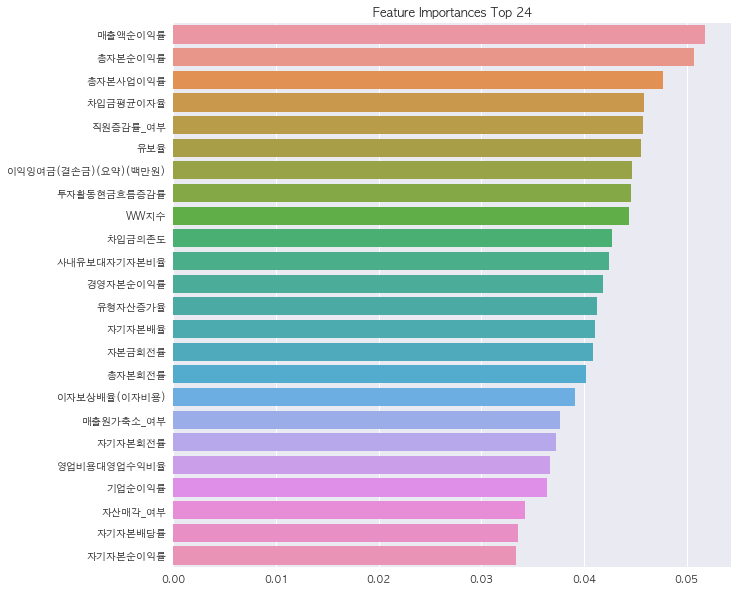

In [203]:
# feature imfortance 찍어보기

model_XGB.fit(X_train, y_train)
#feature 중요도도 그려볼 수 있다. 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df_non_label = X_train
# del df_non_label["Delay_from_due_date"]
# df_non_label.columns

feature_importances_values = model_XGB.feature_importances_
feature_importances = pd.Series(feature_importances_values, index=df_non_label.columns)
feature_importances_top20 = feature_importances.sort_values(ascending=False)[:27] #중요한 순서로 정렬 후 top 24개만 뽑아 시각화

plt.figure(figsize=(10, 10))
plt.title('Feature Importances Top 24')
sns.barplot(x=feature_importances_top20, y=feature_importances_top20.index)
plt.show()

## 7. 회생기업 리스트 뽑기

위에서 피쳐 선택&스케일링하고 오기

In [3510]:
df_부실징후.head(3)

회사명   거래소코드    회계년도  한계기업여부  이자보상배율(이자비용)  부가가치(백만원)  금융비용(백만원)  \
0  케이알모터스(주)  000040  2013.0       1         -4.29    9379.15     603.89   
1  성창기업지주(주)  000180  2013.0       1         -1.39   28423.83    1111.80   
2      디엘(주)  000210  2014.0       0         -3.33  494645.17   31419.37   

   매출액총이익률  매출액순이익률  총자본사업이익률  ...  순자산가치(백만원)          KZ지수   산업매출성장률  \
0     7.59    -6.64     -2.77  ...     57315.0 -8.591876e+10  8.405309   
1    14.62    -2.82     -0.52  ...    253423.0 -4.619692e+10  8.684003   
2     2.11    -4.74     -2.06  ...   2648892.0  8.205913e+10 -2.139125   

           WW지수    NCAV지수  기업생명주기  순매수거래량_기관  순매수거래대금 비중_기관  순매수거래량_외국인  \
0 -6.576044e+08  0.001550       1      154.0       0.000010    666080.0   
1  2.632381e+09  0.106379       0    28438.0       0.001337    -43268.0   
2  1.844954e+09 -1.336562       1 -2124518.0      -0.010160   -122922.0   

   순매수거래대금 비중_외국인  
0        0.001283  
1        0.000147  
2        0.000605  

[3 rows x 88 columns]

In [3514]:
# ttest_col
# selected_variables
# lasso_features
# list_kbest
# list_feature_final

df_modeling = df_부실징후[["거래소코드","회계년도","한계기업여부","이자보상배율(이자비용)"] + list_feature_final]
print(len(df_modeling.columns)-3)

24


In [3515]:
from sklearn.preprocessing import StandardScaler

test_predicted = df_modeling[["거래소코드","회계년도"]] # 예측 DF
y_train_scaling = df_modeling[["한계기업여부", "회계년도"]]
X_train_scaling = df_modeling.drop(["거래소코드", "한계기업여부", "회계년도"],axis=1)

# StandardScaler객체 생성
scaler_stan = StandardScaler()
scaler_stan.fit(X_train_scaling)
data_scaled_stan = scaler_stan.transform(X_train_scaling)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
x_scaled_stan = pd.DataFrame(data = data_scaled_stan, columns=X_train_scaling.columns)
x_scaled_stan

y_train_scaling.reset_index(drop=True, inplace=True)
x_scaled_stan.reset_index(drop=True, inplace=True)

df_modeling = pd.concat([y_train_scaling,x_scaled_stan], axis=1)
df_modeling.reset_index(drop=True, inplace=True)

In [3516]:
# train : 2012 ~ 2016
train_set = df_modeling[((df_modeling["회계년도"]==2017)|(df_modeling["회계년도"]==2018)).map(func_not)]
train_set.reset_index(drop=True, inplace=True)
y_train = train_set[target]
X_train = train_set.drop(["회계년도", target], axis=1)


# predict set : 2012 ~ 2018
test_set = df_modeling
test_set.reset_index(drop=True, inplace=True)
y_test = test_set[target]
X_test = test_set.drop(["회계년도",target], axis=1)

In [3517]:
X_train.shape

(607, 24)

In [3519]:
X_test.shape

(781, 24)

In [3520]:
clf = XGBClassifier(random_state=i, min_child_weight=1, gamma=1, subsample=0.8, colsample_bytree=0.6, max_depth=5, learning_rate=0.15)
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)

[13:52:44] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [3521]:
test_predicted = pd.concat([test_predicted, pd.Series(y_hat)], axis=1)
test_predicted.columns = ["거래소코드", "회계년도", "예측_한계기업여부"]

test_predicted = pd.merge(test_predicted, df_부실징후, on=["거래소코드","회계년도"], how="left")
test_predicted = test_predicted[test_predicted["예측_한계기업여부"]==False]
test_predicted.drop("예측_한계기업여부", axis=1, inplace=True)
test_predicted.sort_values(by="회계년도", inplace=True)
test_predicted.reset_index(drop=True, inplace=True)
test_predicted.to_excel("./datasets/예상회생기업.xlsx")
test_predicted

거래소코드    회계년도         회사명  한계기업여부  이자보상배율(이자비용)  부가가치(백만원)  금융비용(백만원)  \
0    045890  2012.0       (주)금빛       0         -1.49    7320.90    2540.17   
1    024800  2012.0   (주)유성티엔에스       0          0.41   37193.43    7081.65   
2    023430  2012.0      아이이(주)       0        -13.11  -17838.41     121.10   
3    023410  2012.0     유진기업(주)       0          0.08  162469.09   56762.72   
4    020120  2012.0  (주)키다리스튜디오       0        -15.24    -214.04     188.96   
..      ...     ...         ...     ...           ...        ...        ...   
194  101670  2018.0   (주)하이드로리튬       1        -29.21   -2923.47    -169.45   
195  010100  2018.0  한국프랜지공업(주)       0          0.24  106089.54    7855.14   
196  011210  2018.0     현대위아(주)       0          0.08  494645.17   45660.54   
197  038110  2018.0   에코플라스틱(주)       0         -0.41  153080.12    7739.38   
198  033530  2018.0     세종공업(주)       0          0.03  202872.09    3561.20   

     매출액총이익률  매출액순이익률  총자본사업이익률  ...  순자산가치(백만원)          KZ지수   산업매출성장률  \
0      27.73    -8.84     -3.81  ...     41084.0 -6.390782e+10  5.164151   
1       4.72    -0.79      2.33  ...    127087.0 -1.224323e+11  5.680215   
2      13.70  -249.62     -3.93  ...     24732.0 -3.567790e+10  8.167757   
3      11.20    -3.93      0.87  ...    528570.0 -1.938011e+11  5.164151   
4      21.50   -33.02    -17.96  ...     14831.0 -1.576047e+11  8.794477   
..       ...      ...       ...  ...         ...           ...       ...   
194     8.24   -18.97     -6.87  ...     34904.0 -2.575900e+11  2.340424   
195     6.05    -0.13      0.39  ...    220378.0 -6.898715e+10  2.340424   
196     3.83    -0.71      0.36  ...   2648892.0 -1.577222e+11  2.340424   
197     3.52    -1.11     -0.41  ...    118234.0 -5.003876e+10  2.340424   
198    10.26    -1.76      0.44  ...    361365.0 -1.765887e+11  2.340424   

             WW지수    NCAV지수  기업생명주기  순매수거래량_기관  순매수거래대금 비중_기관  순매수거래량_외국인  \
0   -7.830115e+09 -0.329515       2        0.0   0.000000e+00     -3538.0   
1   -2.794350e+09 -1.720378       1        0.0   0.000000e+00    197162.0   
2    1.046014e+10 -0.199694       0        0.0   0.000000e+00   1106880.0   
3    7.511117e+07 -0.291041       3  1248237.0   3.311232e-03    157526.0   
4    1.800479e+09  0.138899       2      -12.0  -8.497215e-08         0.0   
..            ...       ...     ...        ...            ...         ...   
194  3.058941e+08  0.549802       3     6793.0  -2.488396e-06    169081.0   
195 -5.643022e+09 -1.858518       2  -228324.0  -1.259361e-03   -160269.0   
196  3.049536e+09 -1.889964       3   125027.0   8.680732e-04    433854.0   
197 -5.054762e+09 -6.674097       1   -87973.0  -4.826323e-04    371296.0   
198 -3.280401e+09 -0.215757       1 -3528173.0  -3.657640e-02    -17893.0   

     순매수거래대금 비중_외국인  
0          0.000076  
1          0.000623  
2          0.002051  
3          0.000499  
4          0.000000  
..              ...  
194        0.002848  
195       -0.001142  
196        0.002849  
197        0.002172  
198        0.000546  

[199 rows x 88 columns]

In [3522]:
print(len(test_predicted[(test_predicted["기업생명주기"]!=3)&(test_predicted["한계기업여부"]==0)]))
print(len(test_predicted[(test_predicted["기업생명주기"]!=3)&(test_predicted["한계기업여부"]==1)]))

139
13


In [3531]:
test_predicted[test_predicted["회계년도"]==2016]

거래소코드    회계년도         회사명  한계기업여부  이자보상배율(이자비용)  부가가치(백만원)  금융비용(백만원)  \
143  017940  2016.0       (주)이원       0          0.24  163002.36   31098.36   
144  131970  2016.0    (주)두산테스나       0         -2.43   26621.43     360.76   
145  091580  2016.0    상신이디피(주)       0         -0.24   21259.75    1560.49   
146  200470  2016.0     (주)에이팩트       0        -10.41   10590.37      52.02   
147  131370  2016.0     알서포트(주)       0        -19.67   14586.23    -322.49   
148  131290  2016.0     (주)티에스이       0        -21.96   46870.20     -52.11   
149  089530  2016.0   (주)에이티세미콘       0         -1.90   37419.56    3926.12   
150  085670  2016.0     (주)뉴프렉스       0          0.53   26940.50    1658.01   
151  017390  2016.0   서울도시가스(주)       0        -22.46  151347.38   -1451.12   
152  065060  2016.0      (주)지엔코       0          0.51   12272.14    1784.14   
153  044340  2016.0      (주)위닉스       0          0.69   34679.29    3566.40   
154  032580  2016.0     (주)피델릭스       0         -8.77    1884.62     338.42   
155  057030  2016.0    (주)와이비엠넷       0         -6.77   22109.35     289.74   
156  028260  2016.0     삼성물산(주)       0          0.67  494645.17   -1451.12   
157  026910  2016.0     광진실업(주)       0          0.38    7274.71     236.69   
158  020760  2016.0  일진디스플레이(주)       0        -23.88  -23884.12    1097.07   
159  068760  2016.0   (주)셀트리온제약       0         -1.77   25360.99    8350.10   
160  000490  2016.0       (주)대동       0         -1.84   88111.66    6200.99   
161  006400  2016.0    삼성SDI(주)       0        -26.36  494645.17   -1451.12   
162  020710  2016.0     (주)시공테크       0        -29.21   10194.91   -1209.52   
163  049080  2016.0     (주)기가레인       0         -4.14   18559.19    1959.79   
164  038680  2016.0   에스넷시스템(주)       0        -11.70   33911.65    -475.89   

     매출액총이익률  매출액순이익률  총자본사업이익률  ...  순자산가치(백만원)          KZ지수    산업매출성장률  \
143    10.34    -0.95      0.74  ...   1183227.0 -9.515006e+10  19.768262   
144    -0.05     2.44     -1.48  ...     58482.0 -2.674318e+11  21.312141   
145    11.45    -1.33     -0.33  ...     36748.0 -3.637085e+11   0.061381   
146    -8.78   -23.20     -5.93  ...     40178.0 -1.060028e+11  21.312141   
147     0.00     0.75      0.18  ...     46334.0 -2.962935e+11  -3.417551   
148     9.00   -10.88     -6.29  ...    142835.0 -7.321861e+10   0.061381   
149     4.22   -14.37     -6.23  ...     22819.0 -1.451688e+10   0.061381   
150     7.62    -1.72      0.81  ...     39860.0 -3.420598e+10   0.061381   
151    11.89     1.85      0.04  ...    890516.0 -2.159824e+11  -3.417551   
152    58.08    -4.82      0.63  ...    178695.0 -4.874936e+10   0.061381   
153    20.32    -6.51      1.16  ...     91622.0 -2.142995e+11   0.061381   
154    13.66   -16.30     -6.36  ...     24071.0 -9.062304e+10   0.061381   
155    42.85   -11.93     -3.40  ...     47200.0 -5.501028e+11  11.179865   
156    11.86     0.07      1.12  ...   2648892.0 -2.238392e+11  19.768262   
157    11.05    -0.05      0.27  ...     28474.0 -1.545270e+11   0.061381   
158    -9.32   -39.50    -15.82  ...     63833.0 -1.190059e+10   0.061381   
159    40.03   -20.14     -3.28  ...    276706.0 -2.127038e+10   0.061381   
160    20.71    -3.07     -1.79  ...    215149.0 -6.966231e+10   0.061381   
161    14.43     4.06     -5.67  ...   2648892.0 -2.238392e+11   0.061381   
162    -3.84    -8.35     -6.71  ...     78651.0 -1.998682e+11  21.312141   
163     1.26   -13.72     -5.77  ...     57597.0 -7.699512e+10   0.061381   
164    10.64    -1.04     -0.91  ...     70655.0 -1.288938e+11  -3.417551   

             WW지수    NCAV지수  기업생명주기  순매수거래량_기관  순매수거래대금 비중_기관  순매수거래량_외국인  \
143  3.964401e+08 -2.052913       2   -69031.0      -0.002108      2589.0   
144 -1.310231e+10  0.032993       2   371103.0      -0.000989    171580.0   
145 -1.136937e+09 -0.740313       1    18261.0       0.000251    173123.0   
146 -8.586312e+09  0.215450       3     6912.0      -0.000056     83716.0   
147 -4.158133e+08  0.231170    

In [3526]:
# 예측실패한 17개 기업
test_predicted[(test_predicted["기업생명주기"]!=3)&(test_predicted["한계기업여부"]==1)]

거래소코드    회계년도           회사명  한계기업여부  이자보상배율(이자비용)  부가가치(백만원)  금융비용(백만원)  \
165  101390  2017.0        (주)아이엠       1          0.77   37464.22    1384.59   
166  006880  2017.0      신송홀딩스(주)       1         -0.92    9768.12     518.49   
170  082660  2017.0       (주)코스나인       1         -5.44    -934.94    2528.61   
172  070300  2017.0       엑스큐어(주)       1        -29.21    9803.82    -111.33   
173  098120  2017.0  (주)마이크로컨텍솔루션       1        -29.21    4036.20    -196.19   
175  013720  2017.0       씨비아이(주)       1         -0.94    7378.46     219.07   
176  011420  2017.0    (주)갤럭시아에스엠       1        -29.21    -161.81     -11.90   
179  222810  2017.0       (주)세토피아       1        -10.88    4302.82      50.15   
180  087730  2017.0     (주)이엠네트웍스       1        -16.21    5667.09      41.10   
182  046070  2018.0        (주)코다코       1         -1.51   39874.99   11438.16   
189  010690  2018.0         (주)화신       1         -1.28  136009.49   13716.33   
192  122690  2018.0    (주)서진오토모티브       1         -0.83  158424.24   13521.72   
193  008500  2018.0       일정실업(주)       1        -29.21     -92.66      13.97   

     매출액총이익률  매출액순이익률  총자본사업이익률  ...  순자산가치(백만원)          KZ지수    산업매출성장률  \
165     6.73    -1.48      0.98  ...     47450.0 -4.610291e+10   7.191381   
166    12.87    -2.82     -0.18  ...    139153.0 -5.856591e+10  -0.869557   
170    -0.11   -16.05     -7.38  ...     61310.0  7.477280e+09   7.191381   
172    44.89     5.80     -7.31  ...     27274.0 -1.153695e+11  11.063787   
173     8.21   -14.28     -3.66  ...     36931.0 -1.196796e+11   7.191381   
175    10.04    -2.53     -0.58  ...     20407.0 -3.751814e+10   7.191381   
176    -0.41   -15.82     -6.34  ...     40494.0 -2.556763e+11  -3.417551   
179    26.44   -35.61     -4.14  ...      9922.0 -1.135975e+11  11.063787   
180    20.81   -12.92     -6.73  ...     12466.0 -3.102680e+11   7.191381   
182     5.75    -9.58     -4.33  ...     54297.0 -7.054661e+09   2.340424   
189     4.26    -5.31     -2.18  ...    293181.0 -1.604416e+11   2.340424   
192     3.65    -1.96     -1.29  ...    167870.0 -5.425769e+10   2.340424   
193     1.92   -14.31    -11.99  ...     42864.0 -5.976688e+10   2.340424   

             WW지수    NCAV지수  기업생명주기  순매수거래량_기관  순매수거래대금 비중_기관  순매수거래량_외국인  \
165 -6.478443e+09 -0.747194       1      299.0       0.000004    425459.0   
166  6.746009e+09 -0.550342       4   -88588.0      -0.001205     14227.0   
170  3.133540e+09 -0.431163       4   -18599.0      -0.000035   -291259.0   
172 -4.526400e+09  0.543053       1    -9225.0      -0.000118     21690.0   
173 -3.389367e+09  0.465123       2  -338021.0      -0.004269   -141353.0   
175 -2.554542e+09 -0.186389       2   -34130.0      -0.000400    -52926.0   
176  1.349359e+10  0.240099       0     3329.0       0.000020    -53486.0   
179  5.271991e+09 -0.061701       4      -50.0      -0.000122    177755.0   
180  5.934504e+09  0.055822       4   -46088.0      -0.002763    -47334.0   
182  5.305458e+09 -2.538232       0   566860.0       0.000467    -48299.0   
189  3.964471e+08 -1.493129       1  -582210.0      -0.002579     49096.0   
192 -2.823967e+09 -6.674097       1      784.0       0.000005    -36755.0   
193  1.281018e+10  0.660043       0    15974.0       0.001361         0.0   

     순매수거래대금 비중_외국인  
165        0.002816  
166        0.000255  
170       -0.001469  
172        0.000742  
173       -0.003169  
175       -0.000737  
176       -0.001046  
179        0.006160  
180       -0.001689  
182       -0.000032  
189        0.000094  
192       -0.000462  
193        0.000000  

[13 rows x 88 columns]

In [3532]:
from sklearn.metrics import accuracy_score, recall_score, precision_score , f1_score, roc_auc_score, confusion_matrix

# confusion matrix 만드는 함수
def score(y_test, pred):
    # score print
    print('accuracy score : {0:.3f}'.format(accuracy_score(y_test, pred)))
    print('precision score : {0:.3f}'.format(precision_score(y_test, pred)))
    print('recall score : {0:.3f}'.format(recall_score(y_test, pred)))
    print('f1 score : {0:.3f}'.format(f1_score(y_test, pred)))
    print('roc score : {0:.3f}'.format(roc_auc_score(y_test, pred)))
    # confusion matirx 함수
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, annot_kws={"size": 20}, cmap='Blues', fmt='g')
    plt.xlabel('Predicted', fontsize=20)
    plt.ylabel('Actual', fontsize=20)

accuracy score : 0.926
precision score : 0.933
recall score : 0.966
f1 score : 0.949
roc score : 0.894


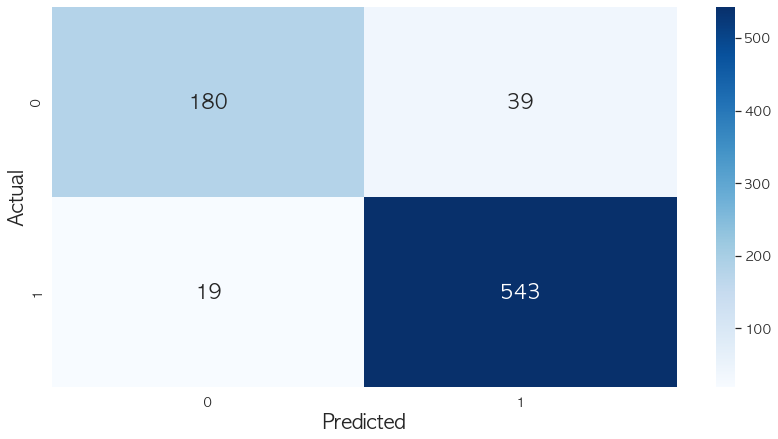

In [3533]:
score(y_test, y_hat)